# Вариант №2.

# Предысловие

Ноутбук задуман так, чтобы вы ввели свой номер варианта, а затем запустили все ячейки. В результате вы получите ответы на вопросы ко всем задачам вашего варианта, останется только занести результаты в отчёт. Однако я настаиваю на том, чтобы минимально проверить входные данные.

Возможные корректировки:
- `plt.xlim` и `plt.ylim`, для корректного отображения графиков.
- Параметр $\pm 1000$ в [этой ячейке](#pm1000), если ваши данные очень близки к этим значениям и теоретически могут их принять.
- В разделах [6](#6) и [7](#7) количество вариантов в данных `X` и `Y` в зависимости от варианта может быть разное. Можете посмотреть на вариант `№7`, там другие данные и показывается, как от этого меняется таблица в отчёте.

Заинтересованный читатель в некоторых разделах может посмотреть пояснения к коду в необычных моментах, но в целом я старался сделать всё максимально понятным и простым.

Этот ноутбук - полный копипаст варианта  `№7`, чтобы продемонстрировать, как с ним работать. Написанное здесь может отличаться только в ячейках `markdown`, но никак не в ячейках кода.

Перед началом работы поменяйте путь к файлу с входными данными на свой [ячейке](#parse).

# Оглавление

- [0. Импорты и определения](#0)
- [1. Описательные статистики](#1)
    - [1.1. Выборочные характеристики](#11)
    - [1.2. Группировка и гистограммы частот](#12)
- [2. Интервальные оценки](#2)
    - [2.1. Доверительные интервалы для математического ожидания](#21)
    - [2.2. Доверительные интервалы для дисперсии](#22)
    - [2.3. Доверительные интервалы для разности математических ожиданий](#23)
    - [2.4. Доверительные интервалы для отношения дисперсий](#24)
- [3. Проверка статистических гипотез о математических ожиданиях и дисперсиях](#3)
    - [3.1. Проверка статистических гипотез о математических ожиданиях](#31)
    - [3.2. Проверка статистических гипотез о дисперсиях](#32)
    - [3.3. Проверка статистических гипотез о равенстве математических ожиданий](#33)
    - [3.4. Проверка статистических гипотез о равенстве дисперсий](#34)
- [4. Критерии согласия](#4)
    - [4.1. Критерий $\chi^2$](#41)
    - [4.2. Критерий Харке-Бера](#42)
- [5. Проверка однородности выборок](#5)
    - [5.1. Критерий знаков](#51)
    - [5.2. Критерий $\chi^2$](#52)
- [6. Таблицы сопряжённости](#6)
- [7. Дисперсионный анализ](#7)
- [8. Корреляционный анализ](#8)
    - [8.1. Рассчёт парных коэффициентов корреляции](#81)
    - [8.2. Рассчёт множественных коэффициентов корреляции](#82)
- [9. Регрессионный анализ](#9)
    - [9.1. Простейшая линейная регрессионная модель](#91)
    - [9.2. Линейная регрессионная модель общего вида](#92)
    - [9.3. Множественная линейная регрессионная модель](#93)
    - [9.4. Выводы](#94)

In [1]:
variant = 2

<a id="0"></a>

# Импорты и определения

### Библиотеки и их настройка

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math as m
import statsmodels.api as sm
from IPython.display import display, Markdown  # для вывода формул в консоль

In [3]:
def mprint(*strings):  # функция вывода маркдаун в консоль
    for s in strings:
        display(Markdown(s))


def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"  # Учитываем индекс

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table


# можно выводить latex в надписях matplotlib
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

### Парсинг вариантов

In [4]:
%pwd

'/Users/retrobanner/Projects/mephi_stats/bdz/var_2'

<a id="parse"></a>

In [5]:
path_to_vars = "../bdz_vars.xls"
path_to_data = "../bdz_data.xls"

In [6]:
# считываем столбики для варианта
datas = pd.read_excel(path_to_vars, index_col=0).loc[variant]

datas.head()

1.1         B7 B8 B9
1.2               B7
2.1, 3.1          B7
2.2, 3.2          B7
2.3, 3.3     B11 B12
Name: 2, dtype: object

In [7]:
# создаём словарик: задание -> список столбцов
variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = (
            datas[tasks]
            .replace("А", "A")
            .replace("В", "B")
            .replace("С", "C")
            .split(" ")
        )

print(variant_dict)

{'1.1': ['B7', 'B8', 'B9'], '1.2': ['B7'], '2.1': ['B7'], '3.1': ['B7'], '2.2': ['B7'], '3.2': ['B7'], '2.3': ['B11', 'B12'], '3.3': ['B11', 'B12'], '2.4': ['B11', 'B12'], '3.4': ['B11', 'B12'], '4': ['B7'], '5': ['B11', 'B12'], '6': ['B3', 'B5'], '7': ['B6', 'B1'], '8.1': ['B11', 'B12'], '8.2': ['B7', 'B8', 'B9'], '9.1': ['B1', 'B2'], '9.2': ['B1', 'B2'], '9.3': ['B1', 'B4', 'B2']}


### Считываем информацию из excel

In [8]:
dfs = pd.read_excel(path_to_data, sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [9]:
# создаём словарик: буква -> название листа в excel
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [10]:
# функция: задание -> необходимые данные
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

### Дополнительные функции

In [11]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

<a id="1"></a>

# Раздел 1. Описательные статистики

<a id="11"></a>

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `B7` (Weight (lbs))

Анализируемый признак 2 – `B8` (Height (inches))

Анализируемый признак 3 – `B9` (Neck circumference (cm))

### Определения

In [12]:
columns = data("1.1")
for i in columns:
    print(i.head())

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64
0    67.75
1    72.25
2    66.25
3    72.25
4    71.25
Name: B8, dtype: float64
0    36.2
1    38.5
2    34.0
3    37.4
4    34.4
Name: B9, dtype: float64


### Привести формулы расчёта выборочных характеристик

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} - 3 = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2} - 3$                                                                                                                                                                                                                                           |


### Рассчитать выборочные характеристики

`pd.skew()` возвращает несмещенный выборочный коэффициент асимметрии, поэтому лучше использовать `stats.skew(bias=True)`, чтобы его получить.

То же самое касается функции `kurtosis()`.

In [13]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    mprint(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 178.92;         $D^*_{X_1} =$ 860.30;         $\sigma^*_{X_1} =$ 29.33;         $\gamma^*_{X_1} =$ 1.20;         $\varepsilon^*_{X_1} =$ 5.14         

$\mathbf{X_2}:$         $\overline x_2 =$ 70.15;         $D^*_{X_2} =$ 13.36;         $\sigma^*_{X_2} =$ 3.66;         $\gamma^*_{X_2} =$ -5.35;         $\varepsilon^*_{X_2} =$ 58.35         

$\mathbf{X_3}:$         $\overline x_3 =$ 37.99;         $D^*_{X_3} =$ 5.89;         $\sigma^*_{X_3} =$ 2.43;         $\gamma^*_{X_3} =$ 0.55;         $\varepsilon^*_{X_3} =$ 2.64         

| Выборочная характеристика                | Признак 1 | Признак 2 | Признак 3 |
| ---------------------------------------- | --------- | --------- | --------- |
| Среднее                                  | 178.92    | 70.15     | 37.99     |
| Выборочная дисперсия                     | 860.30    | 13.36     | 5.89      |
| Выборочное среднеквадратичное отклонение | 29.33     | 3.66      | 2.43      |
| Выборочный коэффициент асимметрии        | 1.20      | -5.35     | 0.55      |
| Выборочный эксцесс                       | 5.14      | 58.35     | 2.64      |


<a id="12"></a>

## 1.2 Группировка и гистограммы частот

### Условие

Анализируемый признак – `B7` (Weight (lbs))

Объём выборки – $n$ = `252`

### Определения

In [14]:
X = data("1.2")[0]
X

0      154.25
1      173.25
2      154.00
3      184.75
4      184.25
        ...  
247    134.25
248    201.00
249    186.75
250    190.75
251    207.50
Name: B7, Length: 252, dtype: float64

In [15]:
print(n := len(X))

252


In [16]:
X = pd.DataFrame(X.values, columns=["value"])
X.head()

,value
0,154.25
1,173.25
2,154.00
3,184.75
4,184.25


### Выбрать число групп

In [17]:
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
mprint(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 363.15, \min = 118.5, n = 252, k = 8$

In [18]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,154.25,"(149.081, 179.662]"
1,173.25,"(149.081, 179.662]"
2,154.00,"(149.081, 179.662]"
3,184.75,"(179.662, 210.244]"
4,184.25,"(179.662, 210.244]"


In [19]:
delta_min = np.min(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
delta_max = np.max(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
mprint(f"Ширина интервалов: от {delta_min:.2f} до {delta_max:.2f}")

Ширина интервалов: от 30.58 до 30.83

| Число групп | Обоснование выбора числа групп                 | Ширина интервалов |
| ----------- | ---------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ | от 30.58 до 30.83 |


### Построить таблицу частот

In [20]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="Номер интервала"))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
Номер интервала,,,,,,
1,118.255,149.081,31,0.123016,31,0.123016
2,149.081,179.662,110,0.436508,141,0.559524
3,179.662,210.244,76,0.301587,217,0.861111
4,210.244,240.825,29,0.115079,246,0.976190
5,240.825,271.406,5,0.019841,251,0.996032
6,271.406,301.987,0,0.000000,251,0.996032
7,301.987,332.569,0,0.000000,251,0.996032
8,332.569,363.150,1,0.003968,252,1.000000


In [21]:
# Чтобы быстрее заполнить табличку
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | 118.25 | 149.08 | 31.0 | 0.12 | 31.0 | 0.12 |
| 2 | 149.08 | 179.66 | 110.0 | 0.44 | 141.0 | 0.56 |
| 3 | 179.66 | 210.24 | 76.0 | 0.3 | 217.0 | 0.86 |
| 4 | 210.24 | 240.82 | 29.0 | 0.12 | 246.0 | 0.98 |
| 5 | 240.82 | 271.41 | 5.0 | 0.02 | 251.0 | 1.0 |
| 6 | 271.41 | 301.99 | 0.0 | 0.0 | 251.0 | 1.0 |
| 7 | 301.99 | 332.57 | 0.0 | 0.0 | 251.0 | 1.0 |
| 8 | 332.57 | 363.15 | 1.0 | 0.0 | 252.0 | 1.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Накопленная частота | Относительная накопленная частота |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------- | --------------------------------- |
| 1               | 118.25         | 149.08          | 31      | 0.12                  | 31                  | 0.12                              |
| 2               | 149.08         | 179.66          | 110     | 0.44                  | 141                 | 0.56                              |
| 3               | 179.66         | 210.24          | 76      | 0.3                   | 217                 | 0.86                              |
| 4               | 210.24         | 240.82          | 29      | 0.12                  | 246                 | 0.98                              |
| 5               | 240.82         | 271.41          | 5       | 0.02                  | 251                 | 1.00                              |
| 6               | 271.41         | 301.99          | 0       | 0.0                   | 251                 | 1.00                              |
| 7               | 301.99         | 332.57          | 0       | 0.0                   | 251                 | 1.00                              |
| 8               | 332.57         | 363.15          | 1       | 0.0                   | 252                 | 1.00                              |

### Построить гистограммы частот и полигоны частот

In [22]:
bin_centers = (groups["low edge"] + groups["high edge"]) / 2
width = groups["high edge"] - groups["low edge"]

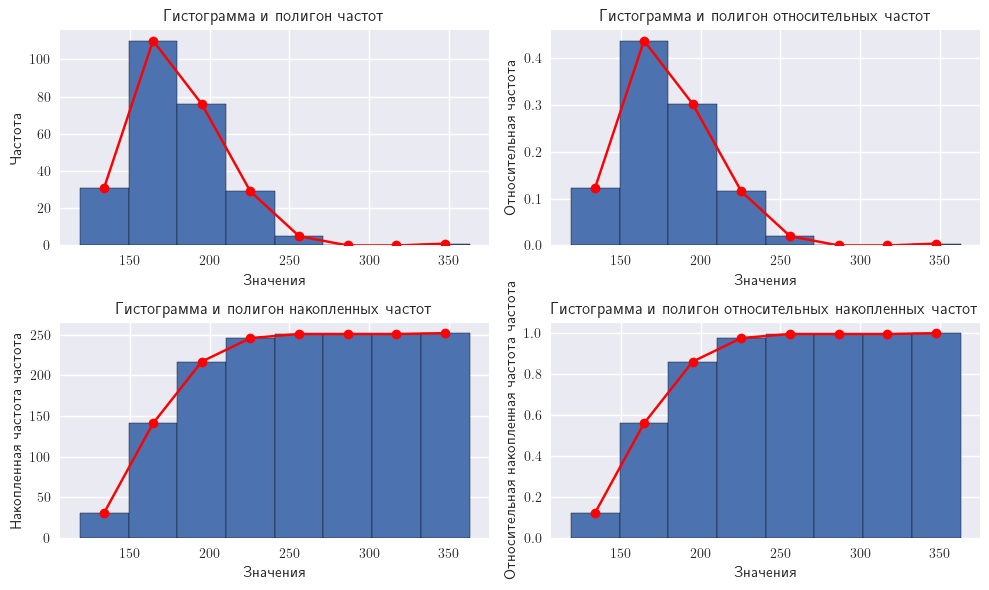

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].bar(
    bin_centers,
    groups["frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 0].plot(bin_centers, groups["frequency"], marker="o", color="r")
axes[0, 0].set_xlabel("Значения")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].set_title("Гистограмма и полигон частот")

axes[0, 1].bar(
    bin_centers,
    groups["relative frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 1].plot(bin_centers, groups["relative frequency"], marker="o", color="r")
axes[0, 1].set_xlabel("Значения")
axes[0, 1].set_ylabel("Относительная частота")
axes[0, 1].set_title("Гистограмма и полигон относительных частот")

axes[1, 0].bar(
    bin_centers,
    groups["cumulative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 0].plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
axes[1, 0].set_xlabel("Значения")
axes[1, 0].set_ylabel("Накопленная частота частота")
axes[1, 0].set_title("Гистограмма и полигон накопленных частот")

axes[1, 1].bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 1].plot(
    bin_centers, groups["cumulative relative frequency"], marker="o", color="r"
)
axes[1, 1].set_xlabel("Значения")
axes[1, 1].set_ylabel("Относительная накопленная частота частота")
axes[1, 1].set_title("Гистограмма и полигон относительных накопленных частот")

plt.tight_layout()
plt.show()

### Построить эмпирическую фукнцию распределения

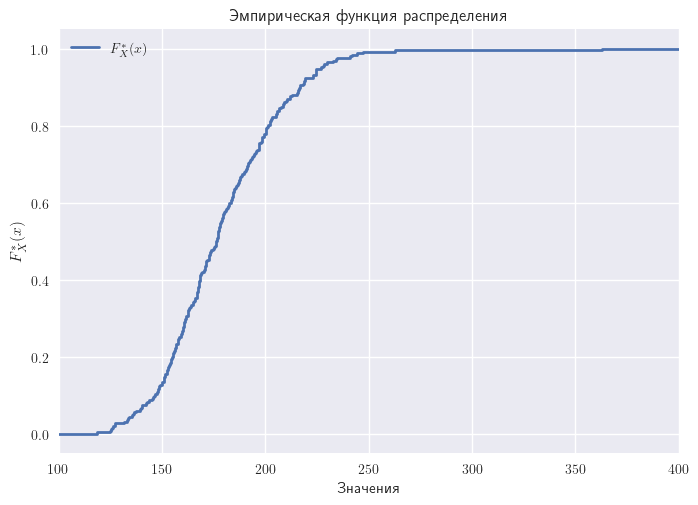

In [24]:
X_sorted = np.sort(X["value"])
X_sorted = np.concatenate(([-10000], X_sorted, [10000]))
F = np.arange(1, n + 1) / n
F = np.concatenate(([0], F, [1]))
plt.step(X_sorted, F, where="post", label=r"$F_X^*(x)$", linewidth=2)
plt.xlim(100, 400)
plt.xlabel("Значения")
plt.ylabel("$F^*_X(x)$")
plt.legend()
plt.title("Эмпирическая функция распределения")
plt.show()

<a id="2"></a>

# Раздел 2. Интервальные оценки

<a id="21"></a>

## 2.1 Доверительные интервалы для математического ожидания

### Условие

Анализируемый признак – `B7` (Weight (lbs))

Объём выборки – $n$ = `252`

Оцениваемый параметр – `m`

### Определения

In [25]:
X = data("2.1")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [26]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

Так как у нас есть только выборка, мы не можем знать параметров генеральной совокупности(в том числе $m$ и $\sigma$), поэтому будем рассчитывать доверительные интервалы, используя данный факт. 

В данном случае `стьюдентизованное среднее` выступает в качестве центральной статистики:

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\overline {\mathbf{X}} - \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |
| Верхняя граница                  | $\overline {\mathbf{X}} + \dfrac{S}{\sqrt{n}} \cdot t_{1-\frac{\alpha}{2}, \left(n-1\right)}$ |


### Рассчитать доверительные интервалы

In [27]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = stats.sem(X)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n - 1, loc=X.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,174.119136,175.278258,175.867935
Верхняя граница,183.729673,182.570551,181.980874


In [28]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 174.12 | 175.28 | 175.87 |
| Верхняя граница | 183.73 | 182.57 | 181.98 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 174.12          | 175.28          | 175.87         |
| Верхняя граница                  | 183.73          | 182.57          | 181.98         |

<a id="22"></a>

## 2.2 Доверительные интервалы для дисперсии

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – $n$ = `252`

Оцениваемый параметр – $\sigma^2$

### Определения

In [29]:
X = data("2.2")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [30]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, \left(n-1\right)}}$ |
| Верхняя граница                  | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, \left(n-1\right)}}$ |


### Рассчитать доверительные интервалы

In [31]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    chi2_upper, chi2_lower = stats.chi2.interval(1 - alpha, df=n - 1)
    intervals[f"$\\alpha =$ {alpha}"] = [
        (n - 1) * X.var(ddof=1) / chi2_lower,
        (n - 1) * X.var(ddof=1) / chi2_upper,
    ]
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,693.828100,730.497795,750.270312
Верхняя граница,1100.224941,1037.243286,1006.856772


In [32]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 693.83 | 730.5 | 750.27 |
| Верхняя граница | 1100.22 | 1037.24 | 1006.86 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 693.83          | 730.5           | 750.27         |
| Верхняя граница                  | 1100.22         | 1037.24         | 1006.86        |

<a id="23"></a>

## 2.3 Доверительные интервалы для разности мат. ожиданий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Оцениваемый параметр – $m_1 - m_2$

### Определения

In [33]:
X1, X2 = data("2.3")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [34]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) - t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| Верхняя граница                  | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) + t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| $S$                              | $\sqrt{\dfrac{(n_1 - 1)S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 -2}}  $                                                                                                 |


### Рассчитать доверительные интервалы

In [35]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = m.sqrt(
    ((n1 - 1) * X1.var(ddof=1) + (n2 - 1) * X2.var(ddof=1))
    / (n1 + n2 - 2)
    * (1 / n1 + 1 / n2)
)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n1 + n2 - 2, loc=X1.mean() - X2.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,-9.457466,-8.951063,-8.692701
Верхняя граница,-5.240153,-5.746556,-6.004918


In [36]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | -9.46 | -8.95 | -8.69 |
| Верхняя граница | -5.24 | -5.75 | -6.0 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | -9.46           | -8.95           | -8.69          |
| Верхняя граница                  | -5.24           | -5.75           | -6.0           |

<a id="24"></a>

## 2.4. Доверительные интервалы для отношения дисперсий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Оцениваемый параметр – $\dfrac{\sigma_1^2}{\sigma_2^2}$


### Определения

In [37]:
X1, X2 = data("2.4")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [38]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                       |
| -------------------------------- | --------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{S_1^2}{S_2^2} \cdot F_{\frac{\alpha}{2}, (n_1-1, n_2-1)}$     |
| Верхняя граница                  | $\dfrac{S_1^2}{S_2^2} \cdot F_{1 - \frac{\alpha}{2}, (n_1-1, n_2-1)}$ |

### Рассчитать доверительные интервалы

In [39]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.f.interval(
        1 - alpha, dfn=n1 - 1, dfd=n2 - 1, loc=0, scale=X1.var(ddof=1) / X2.var(ddof=1)
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,1.634915,1.767942,1.839998
Верхняя граница,3.139347,2.903130,2.789441


In [40]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 1.63 | 1.77 | 1.84 |
| Верхняя граница | 3.14 | 2.9 | 2.79 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 1.63            | 1.77            | 1.84           |
| Верхняя граница                  | 3.14            | 2.9             | 2.79           |

<a id="3"></a>

# Раздел 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

<a id="31"></a>

## 3.1 Проверка статистических гипотез о математических ожиданиях

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – $n$ = `252`

Статистическая гипотеза: $H_0:\ m = m_0; \quad H':\ m \neq m_0$

### Определения

In [41]:
X = data("3.1")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [42]:
print(n := len(X))

252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline X - m_0}{S/\sqrt{n}}$                              |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n - 1)$                                                               |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n - 1}$                                    |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$ |


### Выбрать произвольные значения $m_0$ и проверить статистические гипотезы

In [43]:
alpha = 0.1
m0_list = [120, 180, 240]

mprint(r"### T-test")
for m0 in m0_list:
    z, p_value = stats.ttest_1samp(X, m0)
    mprint(
        r"---",
        f"$H_0: m = m_0 = {m0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### T-test

---

$H_0: m = m_0 = 120$

$z_{выб} =$ 31.83

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 180$

$z_{выб} =$ -0.58

$p =$ 0.56

$H_0$ принимается

---

$H_0: m = m_0 = 240$

$z_{выб} =$ -32.99

$p =$ 0.00

$H_0$ отклоняется

| $m_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод        |
| ----- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------ |
| 120   | 0.1                | 31.83                                        | 0.00      | $H_0$ отклоняется      | $m \neq 120$ |
| 180   | 0.1                | -0.58                                        | 0.56      | $H_0$ принимается      | $m = 180$    |
| 240   | 0.1                | -32.99                                       | 0.00      | $H_0$ отклоняется      | $m \neq 240$ |


<a id="32"></a>

## 3.2 Проверка статистических гипотез о дисперсиях

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – $n$ = `252`

Статистическая гипотеза: $H_0:\ \sigma = \sigma_0; \quad H':\ \sigma \neq \sigma_0$

### Определения

In [44]:
X = data("3.2")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [45]:
print(n := len(X))

252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $m$, значит используем $\chi^2-test$.

|                                                                                  | Выражение                                                                 |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{(n - 1)S^2}{\sigma_0^2}$                                      |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n - 1)$                                                           |
| Формулы расчёта критических точек                                                | $\chi^2_{\frac{\alpha}{2}, n - 1},\ \chi^2_{1 - \frac{\alpha}{2}, n - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$  |


### Выбрать произвольные значения $\sigma_0$ и проверить статистические гипотезы

In [46]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, df=n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [47]:
alpha = 0.1
std0_list = [10, 20, 30]

mprint(r"### $\chi^2$-test")
for std0 in std0_list:
    z, p_value = chisquare(X, std0)
    mprint(
        r"---",
        f"$H_0: \\sigma = \\sigma_0 = {std0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### $\chi^2$-test

---

$H_0: \sigma = \sigma_0 = 10$

$z_{выб} =$ 2167.94

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 20$

$z_{выб} =$ 541.99

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 30$

$z_{выб} =$ 240.88

$p =$ 0.67

$H_0$ принимается

| $\sigma_0$ | Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод            |
| ---------- | ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------- |
| 10         | 0.1                | 2167.94                                      | 0.00      | $H_0$ отклоняется      | $\sigma \neq 10$ |
| 20         | 0.1                | 541.99                                       | 0.00      | $H_0$ отклоняется      | $\sigma \neq 20$ |
| 30         | 0.1                | 240.88                                       | 0.67      | $H_0$ принимается      | $\sigma = 30$    |

<a id="33"></a>

## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Статистическая гипотеза: $H_0:\ m_1 = m_2; \quad H':\ m_1 \neq m_2$

### Определения

In [48]:
X1, X2 = data("3.3")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [49]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                                                                                                  |
| -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline{X_1} - \overline{X_2}}{S\sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$, где $S^2 = \dfrac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n_1 + n_2 - 2)$                                                                                                                                         |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n_1 + n_2 - 2}$                                                                                                              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                   |


### Проверить статистические гипотезы

In [50]:
alphas = [0.01, 0.05, 0.1]
z, p_value = stats.ttest_ind(X1, X2)
mprint(
    r"### two-sample T-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)
for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### two-sample T-test

$H_0: m_1 = m_2$

$z_{выб} =$ -9.01

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод        |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------ |
| 0.01               | -9.01                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |
| 0.05               | -9.01                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$    |
| 0.1                | -9.01                                        | 0.00      | $H_0$ отклоняется      | $m_1 \neq m_2$ |


<a id="34"></a>

## 3.4 Проверка статистических гипотез о равенстве дисперсий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Статистическая гипотеза: $H_0:\ \sigma_1 = \sigma_2; \quad H':\ \sigma_1 \neq \sigma_2$

### Определения

In [51]:
X1, X2 = data("3.4")
X1.head(), X2.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [52]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                 |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{S_1^2}{S_2^2}$                                                                |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(n_1 - 1,\ n_2 - 1)$                                                                    |
| Формулы расчёта критических точек                                                | $F_{\frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1},\ F_{1 - \frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                  |

### Проверить статистические гипотезы

In [53]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [54]:
alphas = [0.01, 0.05, 0.1]
z, p_value = Ftest(X1, X2)
mprint(
    r"### F-test",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### F-test

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 2.27

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 2.27                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.05               | 2.27                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |
| 0.1                | 2.27                                         | 0.00      | $H_0$ отклоняется      | $\sigma_1 \neq \sigma_2$ |

<a id="4"></a>

# Раздел 4. Критерии согласия

## Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – `252`

## Определения

In [55]:
X = data("4")[0]
X.head()

0    154.25
1    173.25
2    154.00
3    184.75
4    184.25
Name: B7, dtype: float64

In [56]:
print(n := len(X))

252


<a id="41"></a>

## 4.1 Критерий $\chi^2$ 

Теоретическое распределение - нормальное.

Статистическая гипотеза - $H_0:\ X \sim N; \quad H':\ X \nsim N$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                         | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                               |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \sum\limits_{i=1}^{k} \dfrac{\left(n_i - n \cdot p_i\right)^2}{n \cdot p_i}$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $p_i$ - вероятность попадания случайной величины $\mathbf X$ в интервал $\Delta_i$ в условиях $H_0$, то есть, если $\Delta_i = (a_{i-1}, a_{i}]$, то $$p_i = \int\limits_{a_{i-1}}^{a_{i}}g(x)dx = G(a_{i}) - G(a_{i-1}).$$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - r - 1)$                                                               | $r$ - количество оцениваемых параметров у предполагаемого распределения $G$.                                                                                                                                                                                                                                                                                                       |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - r - 1}$                                                 | Малые значения $Z$ нам также подходят, поэтому критическая область выбирается правосторонней                                                                                                                                                                                                                                                                                       |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                |                                                                                                                                                                                                                                                                                                                                                                                    |

### Выбрать число групп

Область всевозможных значений предполагаемого распределения делят на $k$ групп(интервалов). Наше предполагаемое распределение - нормальное. Поэтому делим ВСЮ числовую прямую на $k$ интервалов.

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{n}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых ожидаемые частоты $n \cdot p_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Я поступал следующим образом:
1. Разбивал выборку на $k$ групп библиотечными функциями.
2. Левый конец первого интервала и правый конец второго интервала устремлял в $\infty$.
3. Рассчитывал $n \cdot p_i$, и в зависимости от этого соединял некоторые соседние интервалы.
4. Если нужно, подразбивал интервалы с большим $n \cdot p_i$.

In [57]:
k = round(1 + 1.3 * m.log(n))
k

8

In [58]:
frequences, bin_edges = np.histogram(X, bins=k)
bin_edges

array([118.5    , 149.08125, 179.6625 , 210.24375, 240.825  , 271.40625,
       301.9875 , 332.56875, 363.15   ])

<a id="pm1000"></a>

Устремляю левый конец первого интервала в $-\infty$ и правый конец последнего интервала в $+\infty$. Можно считать, что точки $\pm1000$ - это $\pm\infty$, так как за интервал $(-1000, 1000)$, смотря по выборке, вероятность попадания ничтожно мала. Но в каких то случаях, нужно скорректировать эти значения.

In [59]:
bin_edges[0] = -1000
bin_edges[-1] = 1000
bin_edges

array([-1000.     ,   149.08125,   179.6625 ,   210.24375,   240.825  ,
         271.40625,   301.9875 ,   332.56875,  1000.     ])

Для каждого интервала $[a_{i-1}, a_i]$ найдём $p_i = G(a_i) - G(a_{i-1})$ - вероятность попадания случайной величины $\mathbf X$ в интервал $[a_{i-1}, a_i]$ в условиях $H_0$.

Напомним, что в данном случае теоретическое распределение - нормальное. Поэтому и будем использовать `stats.norm.cdf()`.

In [60]:
probabilities = np.diff(stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf(bin_edges))
probabilities

array([1.54946233e-01, 3.55071966e-01, 3.46696912e-01, 1.25693091e-01,
       1.67664622e-02, 8.11224914e-04, 1.40249714e-05, 8.57111686e-08])

Мы нашли вероятности попасть в каждый интервал. Теперь найдём ожидаемые частоты $n \cdot p_i$.

In [61]:
def get_expected_frequencies(bin_edges, n, cdf=stats.norm.cdf):
    probabilities = np.diff(cdf(bin_edges))
    return n * probabilities

In [62]:
get_expected_frequencies(
    bin_edges, n, cdf=stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf
)

array([3.90464507e+01, 8.94781354e+01, 8.73676218e+01, 3.16746590e+01,
       4.22514847e+00, 2.04428678e-01, 3.53429279e-03, 2.15992145e-05])

Как видим, для пятого и всех последующих интервалов ожидаемые частоты меньше 5. Условие $n \cdot p_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [63]:
def merge_interval(bin_edges, expected_frequencies, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        expected_frequencies[i + 1] += expected_frequencies[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        expected_frequencies[i - 1] += expected_frequencies[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if expected_frequencies[i - 1] < expected_frequencies[i + 1]:
            bin_edges.pop(i)
            expected_frequencies[i - 1] += expected_frequencies[i]
        else:
            bin_edges.pop(i + 1)
            expected_frequencies[i + 1] += expected_frequencies[i]
    expected_frequencies.pop(i)

In [64]:
def adjust_intervals(bin_edges, n, distrib=stats.norm, k=None):
    """
    Функция для корректировки интервалов и вероятностей

    Параметры:
    bin_edges: Границы интервалов
    n: uint - объем выборки
    distrib: распределение, которое мы хотим использовать для подсчета вероятностей
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой ожидаемой частотой с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой ожидаемой частотой, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых ожидаемая частота большая, таким образом получая на выходе k >= len(intervals).
    """
    cdf = distrib.cdf
    ppf = distrib.ppf
    expected_frequencies = get_expected_frequencies(bin_edges, n, cdf=cdf).tolist()
    if type(bin_edges) == np.ndarray:
        bin_edges = bin_edges.tolist()

    # Слияние интервалов с ожидаемой частотой <= 5
    i = 0
    while True:
        if expected_frequencies[i] <= 5:
            merge_interval(bin_edges, expected_frequencies, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной ожидаемой частотой.
    if k is not None:
        while len(bin_edges) < k + 1:
            max_expected_frequency = max(expected_frequencies)

            # если максимальная ожидаемая частота меньше 10, то нельзя подразбивать интервалы
            if max_expected_frequency < 10:
                break

            max_index = expected_frequencies.index(max_expected_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что ожидаемая частота в интервалах (a, c) и (c, b) как минимум 5
            c = (ppf(cdf(a) + 5 / n) + ppf(cdf(b) - 5 / n)) / 2

            e_left, e_right = get_expected_frequencies([a, c, b], n, cdf=cdf)

            bin_edges.insert(max_index + 1, c)

            expected_frequencies[max_index] = e_left
            expected_frequencies.insert(max_index + 1, e_right)

    return np.array(bin_edges), np.array(expected_frequencies)

In [65]:
bin_edges, expected_frequencies = adjust_intervals(
    bin_edges, n, distrib=stats.norm(loc=X.mean(), scale=X.std(ddof=1)), k=8
)
bin_edges, expected_frequencies

(array([-1000.        ,   149.08125   ,   164.81703146,   172.31854569,
          179.6625    ,   186.9602006 ,   194.45080324,   210.24375   ,
         1000.        ]),
 array([39.0464507 , 40.48644318, 24.05884788, 24.93284434, 24.62528372,
        23.59176092, 39.15057721, 36.10779206]))

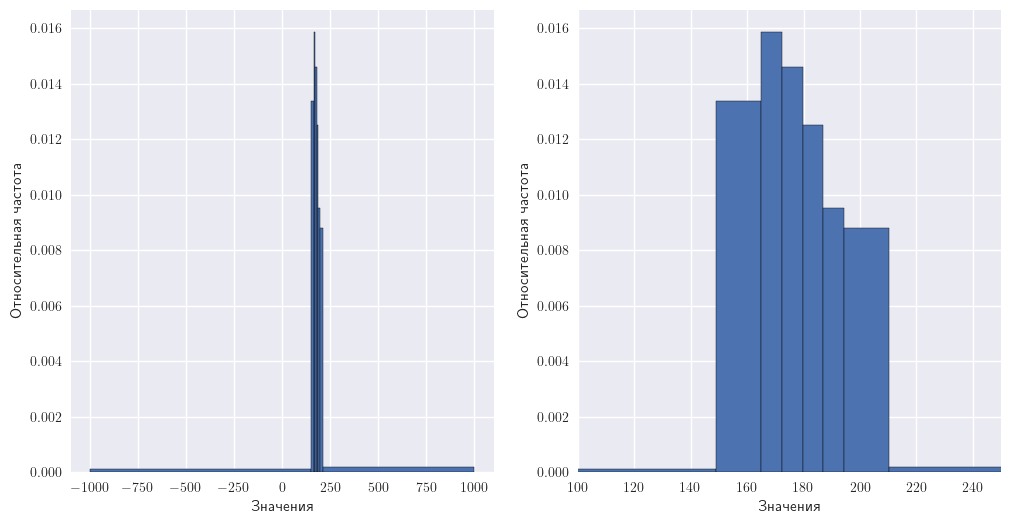

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[0].set_xlabel("Значения")
axes[0].set_ylabel("Относительная частота")

axes[1].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[1].set_xlabel("Значения")
axes[1].set_ylabel("Относительная частота")
plt.xlim(100, 250)

plt.show()

Теперь мы чётко разбили всю числовую прямую на интервалы, для которых ожидаемые частоты $n \cdot p_i \gtrsim 5$.

In [67]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 7.30 до 1149.08

| Число интервалов | Обоснование выбора числа интервалов                                                                               | Ширина интервалов   |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- | ------------------- |
| 8                | $k \approx 1 + 1,3 \ln{n}$ - формула Стерджесса $\\n \cdot p_i \gtrsim 5$ - поправка на чувствительность критерия | от 7.30 до $\infty$ |



### Построить таблицу частот

In [68]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency"] = groups.apply(
    lambda row: ((X >= row["low edge"]) & (X < row["high edge"])).sum(), axis=1
)
groups["relative frequency"] = groups["frequency"] / n
groups["expected probability"] = expected_frequencies / n
groups

,low edge,high edge,frequency,relative frequency,expected probability
Номер интервала,,,,,
1,-1000.000000,149.081250,31,0.123016,0.154946
2,149.081250,164.817031,53,0.210317,0.160660
3,164.817031,172.318546,30,0.119048,0.095472
4,172.318546,179.662500,27,0.107143,0.098940
5,179.662500,186.960201,23,0.091270,0.097719
6,186.960201,194.450803,18,0.071429,0.093618
7,194.450803,210.243750,35,0.138889,0.155359
8,210.243750,1000.000000,35,0.138889,0.143285


In [69]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | expected probability |
|---|---|---|---|---|---|
| 1 | -1000.0 | 149.08 | 31.0 | 0.12 | 0.15 |
| 2 | 149.08 | 164.82 | 53.0 | 0.21 | 0.16 |
| 3 | 164.82 | 172.32 | 30.0 | 0.12 | 0.1 |
| 4 | 172.32 | 179.66 | 27.0 | 0.11 | 0.1 |
| 5 | 179.66 | 186.96 | 23.0 | 0.09 | 0.1 |
| 6 | 186.96 | 194.45 | 18.0 | 0.07 | 0.09 |
| 7 | 194.45 | 210.24 | 35.0 | 0.14 | 0.16 |
| 8 | 210.24 | 1000.0 | 35.0 | 0.14 | 0.14 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Вероятность попадания в интервал при условии истинности основной гипотезы |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------------------------------------------------------------- |
| 1               | $-\infty$      | 149.08          | 31.0    | 0.12                  | 0.15                                                                      |
| 2               | 149.08         | 164.82          | 53.0    | 0.21                  | 0.16                                                                      |
| 3               | 164.82         | 172.32          | 30.0    | 0.12                  | 0.10                                                                      |
| 4               | 172.32         | 179.66          | 27.0    | 0.11                  | 0.10                                                                      |
| 5               | 179.66         | 186.96          | 23.0    | 0.09                  | 0.10                                                                      |
| 6               | 186.96         | 194.45          | 18.0    | 0.07                  | 0.09                                                                      |
| 7               | 194.45         | 210.24          | 35.0    | 0.14                  | 0.16                                                                      |
| 8               | 210.24         | $+\infty$       | 35.0    | 0.14                  | 0.14                                                                      |

### Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

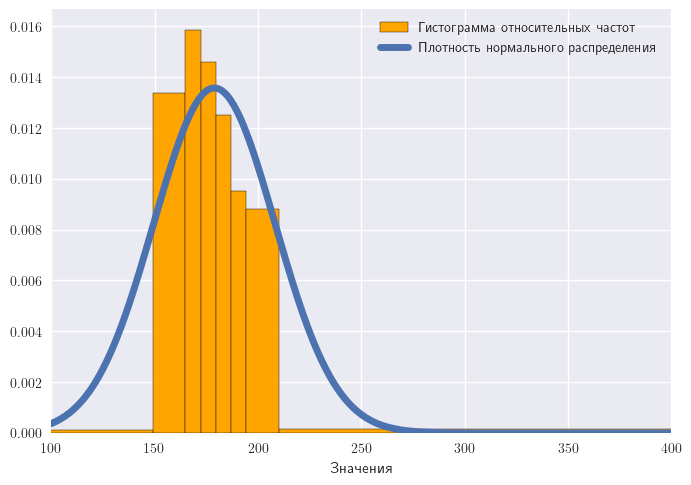

In [70]:
grid = np.linspace(X.min() - 100, X.max() + 100, 1000)
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Гистограмма относительных частот",
    color="orange",
)

plt.plot(
    grid,
    stats.norm.pdf(grid, loc=X.mean(), scale=X.std(ddof=1)),
    label="Плотность нормального распределения",
    lw=5,
)
plt.legend()
plt.xlim(100, 400)
plt.xlabel("Значения")
plt.show()

### Проверить статистические гипотезы

In [71]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.chisquare(groups["frequency"], expected_frequencies, ddof=2)
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 9.07

$p =$ 0.11

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

<a id="42"></a>

## 4.2 Критерий Харке-Бера

Статистическая гипотеза: $H_0:\ X \sim N; \quad H':\ X \nsim N$

### Теоретическая справка

Критерий Харке-Бера (Jarque-Bera) - это критерий проверки гипотезы о нормальности выборки:

$H_0:\ X \sim N; \quad H':\ X \nsim N$

Для проверки нормальности распределения нулевая гипотеза разбивается на две части:

$$H_0^{(1)}: \gamma_X = 0; \quad H'^{(1)}: \gamma_X \neq 0$$
$$H_0^{(2)}: \varepsilon_X = 0; \quad H'^{(2)}: \varepsilon_X \neq 0, где$$

$\gamma_X$ - [коэффициент асимметрии](#формулы), $\varepsilon_X$ - [эксцесс](#формулы).

Для этих гипотез используются следующие статистики:

$Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\ \ \ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$, при этом $Z_1 \mid_{H_0^{(1)}} \sim N(0, 1);\ \ \ Z_2 \mid_{H_0^{(2)}} \sim N(0, 1)$.

Если хоть одна $H_0^{(1)}$ или $H_0^{(2)}$ отклоняется, то исходная гипотеза $H_0$ отклоняется.

Для проверки основной гипотезы строится общая статистика: $Z = Z_1^2 + Z_2^2$, при этом $Z \mid_{H_0} \sim \chi^2(2)$. Критическая область - правосторонняя.

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = Z^2_1 + Z^2_2$, где $\\Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\\ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$ | $\gamma^*_X$ - [выборочный коэффициент асимметрии](#формулы), $\\ \varepsilon^*_X$ - [выборочный эксцесс](#формулы), $\\ n$ - объём выборки. |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(2)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ 2}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Проверить статистические гипотезы

In [72]:
z, p_value = stats.jarque_bera(X)
mprint(
    r"### Jarque-Bera test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Jarque-Bera test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 337.89

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод       |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ----------- |
| 0.01               | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.05               | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |
| 0.1                | 337.89                                       | 0.0       | $H_0$ отклоняется      | $X \nsim N$ |

## Вывод (в терминах предметной области):

В результате проведённого в п.4 статистического анализа обнаружено, что критерий $\chi^2$ не отвергает гипотезу о нормальности распределения, но критерий Харке-Бера отвергает её.

Так как для этих данных критерий Харке-Бера более чувствителен, чем критерий $\chi^2$, то можно сделать вывод, что выборка `B7` не имеет нормального распределения.

<a id="5"></a>

# Раздел 5. Проверка однородности выборок

## Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

## Определения

In [73]:
X, Y = data("5")

X.head(), Y.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [74]:
print(n1 := len(X), n2 := len(Y))

252 252


<a id="51"></a>

## 5.1 Критерий знаков

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x); \quad H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{K_+ - \dfrac{n}{2}}{\sqrt{\dfrac{n}{4}}}$ | $K_+$ - количество знаков `+` в выборке $z_1, \dots, z_n = x_1 - y_1, \dots, x_n - y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $N(0, 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\pm u_{1 - \frac{\alpha}{2}}$                                                                                                         | Двусторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                                |                                                                                                                                         |


### Проверить статистические гипотезы

In [75]:
def sign_test(X, Y):
    if len(X) != len(Y):
        raise ValueError("Длины выборок должны совпадать")
    n = len(X)
    k = sum(X > Y)
    z = (k - n / 2) / m.sqrt(n / 4)
    p_value = 2 * min(stats.norm.cdf(z), 1 - stats.norm.cdf(z))
    return z, p_value

In [76]:
alphas = [0.01, 0.05, 0.1]

z, p_value = sign_test(X, Y)
mprint(
    r"### Sign test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Sign test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ -12.72

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | -12.72                                       | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | -12.72                                       | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | -12.72                                       | 0.00      | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

<a id="52"></a>

## 5.2 Критерий $\chi^2$

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x); \quad H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = nm\sum\limits_{i=1}^{k}\dfrac{1}{n_i+m_i}\left(\dfrac{n_i}{n} + \dfrac{m_i}{m}\right)$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $m_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $n$ - объём выборки $x_1, \dots, x_n$ $\\$ $m$ - объём выборки $y_1, \dots, y_m$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - 1}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Выбрать число групп

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{\max(n, m)}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых $n_i + m_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Рассмотрим данный пример:

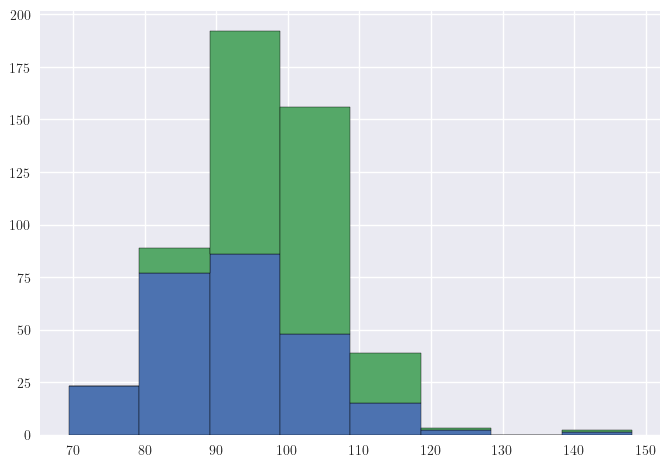

In [77]:
k = round(1 + 1.3 * m.log(max(n1, n2)))

frequences, bin_edges, _ = plt.hist((X, Y), bins=k, edgecolor="black", stacked=True)
plt.show()

Посмотрим на значения $n_i + m_i$ для каждого интервала.

In [78]:
frequences[1]

array([ 23.,  89., 192., 156.,  39.,   3.,   0.,   2.])

Как видим, для последних трёх интервалов $n_i + m_i < 5$. Условие $n_i + m_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [79]:
def merge_interval(bin_edges, frequences1, frequences2, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        frequences1[i + 1] += frequences1[i]
        frequences2[i + 1] += frequences2[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        frequences1[i - 1] += frequences1[i]
        frequences2[i - 1] += frequences2[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if (
            frequences1[i - 1] + frequences2[i - 1]
            < frequences1[i + 1] + frequences2[i + 1]
        ):
            bin_edges.pop(i)
            frequences1[i - 1] += frequences1[i]
            frequences2[i - 1] += frequences2[i]
        else:
            bin_edges.pop(i + 1)
            frequences1[i + 1] += frequences1[i]
            frequences2[i + 1] += frequences2[i]
    frequences1.pop(i)
    frequences2.pop(i)

In [80]:
def adjust_intervals(bin_edges, X1, X2, k=None):
    """
    Функция для корректировки интервалов и частот попадания в них
    bin_edges: Границы интервалов
    X1: Первая выборка
    X2: Вторая выборка
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой частотой попадания с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой частотой попадания, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых частота попадания большая, таким образом получая на выходе k >= len(intervals).
    """
    frequences1, _ = np.histogram(X1, bins=bin_edges)
    frequences2, _ = np.histogram(X2, bins=bin_edges)
    frequences1 = frequences1.tolist()
    frequences2 = frequences2.tolist()

    # Слияние интервалов с малой частотой попадания
    i = 0
    while True:
        if frequences1[i] + frequences2[i] < 5:
            merge_interval(bin_edges, frequences1, frequences2, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной частотой попадания
    if k is not None:
        while len(bin_edges) < k + 1:
            total_frequency = [x + y for x, y in zip(frequences1, frequences2)]
            max_frequency = max(total_frequency)

            # если максимальная частота меньше 5, то нельзя подразбивать интервалы
            if max_frequency < 10:
                break

            max_index = total_frequency.index(max_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что частота попадания в интервалах (a, c) и (c, b) как минимум 5
            c = (a + b) / 2

            frequences1[max_index] = ((X1 >= a) & (X1 < c)).sum()
            frequences2[max_index] = ((X2 >= a) & (X2 < c)).sum()
            frequences1.insert(max_index + 1, ((X1 >= c) & (X1 < b)).sum())
            frequences2.insert(max_index + 1, ((X2 >= c) & (X2 < b)).sum())
            bin_edges.insert(max_index + 1, c)

    return bin_edges, frequences1, frequences2

In [81]:
bin_edges, frequences1, frequences2 = adjust_intervals(bin_edges.tolist(), X, Y, k=k)
np.array(frequences1) + np.array(frequences2)

array([ 23,  89,  78, 114, 101,  55,  39,   5])

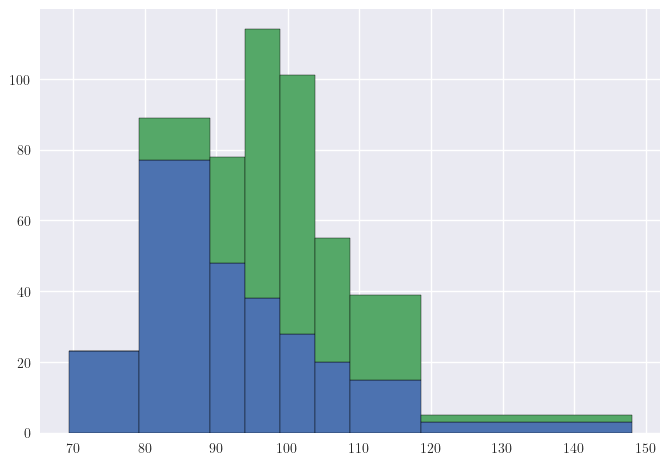

In [82]:
frequences, bin_edges, _ = plt.hist(
    (X, Y), bins=bin_edges, edgecolor="black", stacked=True
)
plt.show()

In [83]:
frequences[1]

array([ 23.,  89.,  78., 114., 101.,  55.,  39.,   5.])

Теперь группировка выборок проведена правильно.

In [84]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 4.92 до 29.51

| Число интервалов | Обоснование выбора числа интервалов                                                                                     | Ширина интервалов |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | ----------------- |
| 8                | $k \approx 1 + 1.3 \ln \max(n, m)$ - формула Стерджесса $\\n_i + m_i \gtrsim 5$ - поправка на чувствительность критерия | от 4.92 до 29.51  |



### Построить таблицу частот

In [85]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency1"] = frequences[0]
groups["frequency2"] = frequences[1] - frequences[0]
groups["relative frequency1"] = groups["frequency1"] / n1
groups["relative frequency2"] = groups["frequency2"] / n2

groups

,low edge,high edge,frequency1,frequency2,relative frequency1,relative frequency2
Номер интервала,,,,,,
1,69.40000,79.23750,23.0,0.0,0.091270,0.000000
2,79.23750,89.07500,77.0,12.0,0.305556,0.047619
3,89.07500,93.99375,48.0,30.0,0.190476,0.119048
4,93.99375,98.91250,38.0,76.0,0.150794,0.301587
5,98.91250,103.83125,28.0,73.0,0.111111,0.289683
6,103.83125,108.75000,20.0,35.0,0.079365,0.138889
7,108.75000,118.58750,15.0,24.0,0.059524,0.095238
8,118.58750,148.10000,3.0,2.0,0.011905,0.007937


In [86]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency1 | frequency2 | relative frequency1 | relative frequency2 |
|---|---|---|---|---|---|---|
| 1 | 69.4 | 79.24 | 23.0 | 0.0 | 0.09 | 0.0 |
| 2 | 79.24 | 89.08 | 77.0 | 12.0 | 0.31 | 0.05 |
| 3 | 89.08 | 93.99 | 48.0 | 30.0 | 0.19 | 0.12 |
| 4 | 93.99 | 98.91 | 38.0 | 76.0 | 0.15 | 0.3 |
| 5 | 98.91 | 103.83 | 28.0 | 73.0 | 0.11 | 0.29 |
| 6 | 103.83 | 108.75 | 20.0 | 35.0 | 0.08 | 0.14 |
| 7 | 108.75 | 118.59 | 15.0 | 24.0 | 0.06 | 0.1 |
| 8 | 118.59 | 148.1 | 3.0 | 2.0 | 0.01 | 0.01 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота признака 1 | Частота признака 2 | Относительная частота признака 1 | Относительная частота признака 2 |
| --------------- | -------------- | --------------- | ------------------ | ------------------ | -------------------------------- | -------------------------------- |
| 1               | 69.4           | 79.24           | 23.0               | 0.0                | 0.09                             | 0.0                              |
| 2               | 79.24          | 89.08           | 77.0               | 12.0               | 0.31                             | 0.05                             |
| 3               | 89.08          | 93.99           | 48.0               | 30.0               | 0.19                             | 0.12                             |
| 4               | 93.99          | 98.91           | 38.0               | 76.0               | 0.15                             | 0.3                              |
| 5               | 98.91          | 103.83          | 28.0               | 73.0               | 0.11                             | 0.29                             |
| 6               | 103.83         | 108.75          | 20.0               | 35.0               | 0.08                             | 0.14                             |
| 7               | 108.75         | 118.59          | 15.0               | 24.0               | 0.06                             | 0.1                              |
| 8               | 118.59         | 148.1           | 3.0                | 2.0                | 0.01                             | 0.01                             |

### Построить гистограммы относительных частот на одном графике

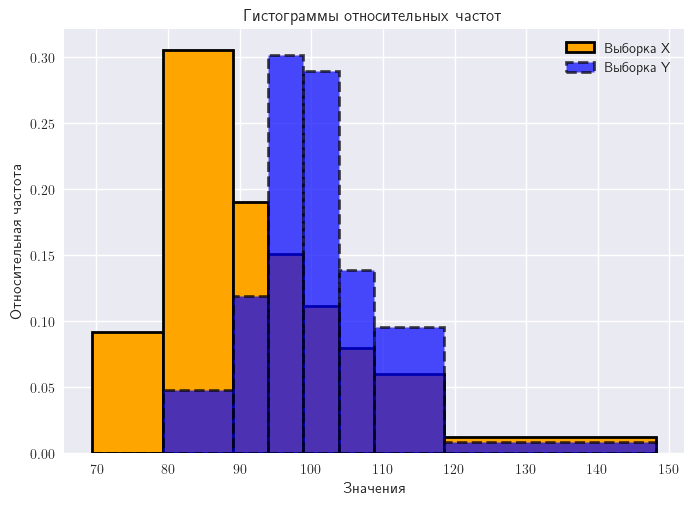

In [87]:
plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency1"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка X",
    color="orange",
    lw=2,
)

plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency2"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка Y",
    alpha=0.7,
    linestyle="--",
    lw=2,
    color="blue",
)
plt.legend()
plt.title("Гистограммы относительных частот")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

### Проверить статистические гипотезы

In [88]:
def chi2_2samp(frequencies1, frequencies2):
    if len(frequencies1) != len(frequencies2):
        raise ValueError("Длины выборок должны совпадать")
    k = len(frequencies1)
    n = sum(frequencies1)
    m = sum(frequencies2)
    z = (
        n
        * m
        * sum(
            (frequencies1 / n - frequencies2 / m) ** 2 / (frequencies1 + frequencies2)
        )
    )
    p_value = stats.chi2.sf(z, df=k - 1)
    return z, p_value

In [89]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_2samp(groups["frequency1"], groups["frequency2"])
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 113.71

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 113.71                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 113.71                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 113.71                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.5 статистического анализа обнаружено, что выборки `B11` и `B12` неоднородны.

<a id="6"></a>

# Раздел 6. Таблицы сопряжённости

## Условие

Факторный признак $x$ - `B3` (Body fat)

Результативный признак $y$ - `B5` (Sex)

Объёмы выборок - $n_1 = n_2 = n = 252$

Статистическая гипотеза $H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y); \quad H':\ \exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$

## Определения

In [90]:
X, Y = data("6")
X.head(), Y.head()

(0    normal
 1       low
 2      high
 3    normal
 4      high
 Name: B3, dtype: object,
 0    Male
 1    Male
 2    Male
 3    Male
 4    Male
 Name: B5, dtype: object)

In [91]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

252 252


## Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                               | Пояснение использованных обозначений                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула рассчёта статистики критерия                                             | $Z = \sum\limits_{i=1}^{k_1}\sum\limits_{j=1}^{k_2}\dfrac{(n_{ij} - m_{ij})^2}{m_{ij}}$ | $(x_1, y_1), \dots, (x_n, y_n)$ - наблюдения случайного вектора $(X, Y)$, где $X, Y$ - случайные величины дискретного типа $\\$ $x^{(1)}, \dots, x^{(k_1)}$ - варианты признака $X$ $\\$ $y^{(1)}, \dots, y^{(k_2)}$ - варианты признака $Y$ $\\$ $n_{ij}$ - выборочная частота варианта $(x^{(i)}, y^{(j)})$ в выборке $(x_1, y_1), \dots, (x_n, y_n)$ $\\$ $m_{ij}$ - теоретическая частота варианта  $(x^{(i)}, y^{(j)})$ в выборке $(x_1, y_1), \dots, (x_n, y_n)$ при условии истинности $H_0$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2((k_1 - 1)(k_2 - 1))$                                                            |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| Формула расчета критической точки                                                | $\chi^2_{1 - \alpha,\ (k_1 - 1)(k_2 -1)}$                                               | Правосторонняя критическая область                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| Формула расчета p-value                                                          | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |


## Построить эмпирическую таблицу сопряжённости

In [92]:
df = pd.DataFrame({"X": X, "Y": Y})
df

,X,Y
0,normal,Male
1,low,Male
2,high,Male
3,normal,Male
4,high,Male
...,...,...
247,normal,Male
248,high,Female
249,high,Female
250,high,Female


In [93]:
emperical_table = pd.crosstab(df["X"], df["Y"], margins=True)
emperical_table

Y,Female,Male,All
X,,,
high,65,55,120
low,8,31,39
normal,20,73,93
All,93,159,252


In [94]:
print(dataframe_to_markdown(emperical_table))

| X\Y | Female | Male | All |
|---|---|---|---|
| high | 65 | 55 | 120 |
| low | 8 | 31 | 39 |
| normal | 20 | 73 | 93 |
| All | 93 | 159 | 252 |



| X\Y    | Female | Male | All |
| ------ | ------ | ---- | --- |
| high   | 65     | 55   | 120 |
| low    | 8      | 31   | 39  |
| normal | 20     | 73   | 93  |
| All    | 93     | 159  | 252 |

| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $\sum$ |
| ------------------- | --------- | --------- | ------ |
| $x^{(1)}$           | 65        | 55        | 120    |
| $x^{(2)}$           | 8         | 31        | 39     |
| $x^{(3)}$           | 20        | 73        | 93     |
| $\sum$              | 93        | 159       | 252    |

## Построить теоретическую таблицу сопряжённости

### Теоретическая справка

Пусть $H_0$ верна. Тогда $F_Y(y \mid_{X = x^{(i)}}) = F_Y(y)$. У нас дискретные случайные величины, поэтому это эквивалентно $P\left[Y = y^{(j)} \mid X = x^{(i)}\right] = P\left[Y = y^{(j)}\right]$.

Это значит, что случайные величины $X$ и $Y$ независимы. Значит $P\left[X = x^{(i)}, Y = y^{(j)}\right] = P\left[X = x^{(i)}\right] \cdot P\left[Y = y^{(j)}\right] \Leftrightarrow p_{ij} = p_i \cdot p_j = \sum\limits_{k = 1}^{k_2}p_{ik} \cdot \sum\limits_{l=1}^{k_1}p_{lj}$.

Теоретические частоты отсюда легко находятся: $m_{ij} = n \cdot p_{ij} = n \cdot \sum\limits_{k = 1}^{k_2}p_{ik} \cdot \sum\limits_{l=1}^{k_1}p_{lj} = n \cdot \sum\limits_{k = 1}^{k_2}\dfrac{n_{ik}}{n} \cdot \sum\limits_{l=1}^{k_1}\dfrac{n_{lj}}{n} = \dfrac{\sum\limits_{k = 1}^{k_2}n_{ik} \cdot \sum\limits_{l=1}^{k_1}n_{lj}}{n}$.

Итак, для начала получим матрицу $A = \|a_{ij}\|_{k_1 \times k_2}$, где $a_{ij} = \sum\limits_{k = 1}^{k_2}n_{ik} \cdot \sum\limits_{l=1}^{k_1}n_{lj}$

Матрицу $A$ можно получить простым матричным произведением:

$$
A = \overrightarrow{V_1}^T \cdot \overrightarrow{V_2} = \begin{pmatrix}
\sum\limits_{k = 1}^{k_2}n_{1k} \\
\sum\limits_{k = 1}^{k_2}n_{2k} \\
\vdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \\
\end{pmatrix} \cdot \begin{pmatrix} \sum\limits_{l=1}^{k_1}n_{l1} & \sum\limits_{l=1}^{k_1}n_{l2} & \cdots & \sum\limits_{l=1}^{k_1}n_{lk_2} \end{pmatrix} = 
\begin{pmatrix} 
\sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} & \cdots & \sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\cdots & \ddots & \cdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} &  \cdots & \sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\end{pmatrix}
$$


Получаем $\overrightarrow{V_1}^T$:

In [95]:
V1 = np.array(emperical_table.iloc[:-1, -1])
V1

array([120,  39,  93])

In [96]:
V1 = np.atleast_2d(V1).T
V1

array([[120],
       [ 39],
       [ 93]])

Получаем $\overrightarrow{V_2}$:

In [97]:
V2 = np.array(emperical_table.iloc[-1][:-1])
V2

array([ 93, 159])

In [98]:
V2 = np.atleast_2d(V2)
V2

array([[ 93, 159]])

Получаем матрицу $A$:

In [99]:
A = np.dot(V1, V2)
A

array([[11160, 19080],
       [ 3627,  6201],
       [ 8649, 14787]])

Строим теоретическую таблицу сопряжённости:

In [100]:
theoretical_table = pd.DataFrame(
    A / n,
    index=emperical_table.index[:-1],
    columns=emperical_table.columns[:-1],
)
theoretical_table

Y,Female,Male
X,,
high,44.285714,75.714286
low,14.392857,24.607143
normal,34.321429,58.678571


Добавим в таблицу суммы по строкам и столбцам:

In [101]:
theoretical_table["All"] = theoretical_table.sum(axis=1)
theoretical_table.loc["All"] = theoretical_table.sum()
theoretical_table

Y,Female,Male,All
X,,,
high,44.285714,75.714286,120.0
low,14.392857,24.607143,39.0
normal,34.321429,58.678571,93.0
All,93.000000,159.000000,252.0


In [102]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | Female | Male | All |
|---|---|---|---|
| high | 44.29 | 75.71 | 120.0 |
| low | 14.39 | 24.61 | 39.0 |
| normal | 34.32 | 58.68 | 93.0 |
| All | 93.0 | 159.0 | 252.0 |



| X\Y    | Female | Male  | All   |
| ------ | ------ | ----- | ----- |
| high   | 44.29  | 75.71 | 120.0 |
| low    | 14.39  | 24.61 | 39.0  |
| normal | 34.32  | 58.68 | 93.0  |
| All    | 93.0   | 159.0 | 252.0 |

| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $\sum$ |
| ------------------- | --------- | --------- | ------ |
| $x^{(1)}$           | 44.29     | 75.71     | 120    |
| $x^{(2)}$           | 14.39     | 24.61     | 39     |
| $x^{(3)}$           | 34.32     | 58.68     | 93     |
| $\sum$              | 93        | 159       | 252    |
        

## Проверить статистические гипотезы

In [103]:
alphas = [0.01, 0.05, 0.1]

res = stats.chi2_contingency(emperical_table.iloc[:-1, :-1])
res

Chi2ContingencyResult(statistic=np.float64(29.327732209282477), pvalue=np.float64(4.281183740842417e-07), dof=2, expected_freq=array([[44.28571429, 75.71428571],
       [14.39285714, 24.60714286],
       [34.32142857, 58.67857143]]))

In [104]:
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    f"$H_0:\\ F_Y(y \\mid_{{X = x^{{(1)}}}}) = F_Y(y \\mid_{{X = x^{{(2)}}}}) = \\dots = F_Y(y \\mid_{{X = x^{{(k_1)}}}}) = F_Y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p)}")

### $\chi^2$-test

$H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y)$

$z_{выб} =$ 29.33

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                                                                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------------------------------------------------------ |
| 0.01               | 29.33                                        | 0.00       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |
| 0.05               | 29.33                                        | 0.00       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |
| 0.1                | 29.33                                        | 0.00       | $H_0$ отклоняется      | $\exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.6 статистического анализа обнаружено, что между факторным признаком `B3` и результативным признаком `B5` присутствует статистическая связь. Под действием `B3` оказывается влияние на распределение `B5`.

<a id="7"></a>

# Раздел 7. Дисперсионный анализ

## Условие

Факторный признак $x$ – `B6` (Town)

Результативный признак $y$ – `B1` (Body density determined from underwater weighing)

Число вариантов факторного признака – $k = 4$

Объёмы выборок – $n_1 = n_2 = n = 252$

Статистическая гипотеза – $H_0:\ F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y); \quad H':\ \exists i, j: F_Y(y \mid_{X = x_i}) \neq F_Y(y \mid_{X = x_j})$

## Определения

In [105]:
X, Y = data("7")
X.head(), Y.head()

(0    Somerville
 1    Somerville
 2    Somerville
 3    Somerville
 4    Somerville
 Name: B6, dtype: object,
 0    1.0708
 1    1.0853
 2    1.0414
 3    1.0751
 4    1.0340
 Name: B1, dtype: float64)

In [106]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

252 252


In [107]:
print(k := len(X.unique()))

4


## Рассчитать групповые выборочные характеристики

In [108]:
df = pd.DataFrame({"X": X, "Y": Y}).groupby("X")["Y"].apply(np.array).to_frame()
df

,Y
X,
Arlington,"[1.0524, 1.0356, 1.028, 1.043, 1.0396, 1.0317,..."
Norwood,"[1.0648, 1.0575, 1.0472, 1.0452, 1.0398, 1.043..."
Revere,"[1.0926, 1.0983, 1.0521, 1.0603, 1.0414, 1.076..."
Somerville,"[1.0708, 1.0853, 1.0414, 1.0751, 1.034, 1.0502..."


In [109]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="№ п/п"))
groups[r"$x^{(i)}$"] = df.index
groups[r"$n_i$"] = df["Y"].apply(len).values
groups[r"$\overline{y_i}$"] = df["Y"].apply(np.mean).values
groups[r"$s_i^2$"] = df["Y"].apply(np.var, ddof=0).values
groups

,$x^{(i)}$,$n_i$,$\overline{y_i}$,$s_i^2$
№ п/п,,,,
1,Arlington,73,1.053964,0.000241
2,Norwood,41,1.054844,0.000236
3,Revere,82,1.054324,0.000437
4,Somerville,56,1.060036,0.000471


In [110]:
print(dataframe_to_markdown(groups))

| № п/п | $x^{(i)}$ | $n_i$ | $\overline{y_i}$ | $s_i^2$ |
|---|---|---|---|---|
| 1 | Arlington | 73 | 1.05 | 0.0 |
| 2 | Norwood | 41 | 1.05 | 0.0 |
| 3 | Revere | 82 | 1.05 | 0.0 |
| 4 | Somerville | 56 | 1.06 | 0.0 |



| № п/п | $x^{(i)}$  | $n_i$ | $\overline{y_i}$ | $s_i^2$ |
| ----- | ---------- | ----- | ---------------- | ------- |
| 1     | Arlington  | 73    | 1.05             | 0.0     |
| 2     | Norwood    | 41    | 1.05             | 0.0     |
| 3     | Revere     | 82    | 1.05             | 0.0     |
| 4     | Somerville | 56    | 1.06             | 0.0     |

## Привести формулы расчёта показателей вариации, используемых в дисперсионном анализе

| Источник вариации      | Показатель вариации                                                                                                                                                                                     | Число степеней свободы | Несмещённая оценка                         |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------ |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i(\overline{y_i} - \overline{y})^2$                                                                                                      | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}}$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i\tilde{\sigma_i}^2$, где $\tilde{\sigma_i}^2 =  \dfrac{1}{n_i}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y_i}^2)$ - групповая дисперсия | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}}$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij}-\overline{y})^2$                                                                                              | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}}$   |

## Рассчитать показатели вариации, используемые в дисперсионном анализе

In [111]:
S_general = float(Y.var(ddof=0))
S_inside = 1 / n * sum(groups[r"$n_i$"] * groups[r"$s_i^2$"])
S_between = (
    1 / n * sum(groups[r"$n_i$"] * (groups[r"$\overline{y_i}$"] - Y.mean()) ** 2)
)

S_general_unbiased = S_general * n / (n - 1)
S_inside_unbiased = S_inside * n / (n - k)
S_between_unbiased = S_between * n / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 0.00$

$\tilde{D}_{\text{внутр}} = 0.00$

$\tilde{D}_{\text{общ}} = 0.00$

$\tilde{D}_{\text{межгр, несмещ}} = 0.00$

$\tilde{D}_{\text{внутр, несмещ}} = 0.00$

$\tilde{D}_{\text{общ, несмещ}} = 0.00$

| Источник вариации      | Показатель вариации               | Число степеней свободы | Несмещённая оценка                                |
| ---------------------- | --------------------------------- | ---------------------- | ------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = 0.00$ | $k - 1 = 3$            | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}} = 0.00$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = 0.00$ | $n - k = 248$          | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} = 0.00$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = 0.00$   | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} = 0.00$   |

## Проверить правило сложения дисперсий

In [112]:
mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} + \\tilde{{D}}_{{\\text{{внутр}}}} = {S_between + S_inside:.2f}$",
)
print(S_between + S_inside - S_general < 1e-10)

$\tilde{D}_{\text{межгр}} = 0.00$

$\tilde{D}_{\text{внутр}} = 0.00$

$\tilde{D}_{\text{общ}} = 0.00$

$\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}} = 0.00$

True


| Показатель | $\tilde{D}_{\text{межгр}}$ | $\tilde{D}_{\text{внутр}}$ | $\tilde{D}_{\text{общ}}$ | $\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}}$ |
| ---------- | -------------------------- | -------------------------- | ------------------------ | ----------------------------------------------------- |
| Значение   | 0.00                       | 0.00                       | 0.00                     | 0.00                                                  |


## Рассчитать показатели тесноты связи между факторным и результативным признаками

In [113]:
eta_squared = S_between / S_general

eta = m.sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.02$

$\tilde{\eta} = 0.13$

| Показатель                            | Формула расчета                                                                                          | Значение |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------- | -------- |
| Эмпирический коэффициент детерминации | $\tilde{\eta}^2 = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}$                              | 0.02     |
| Эмпирическое корреляционное отношение | $\tilde{\eta} = \sqrt{\tilde{\eta}^2} = \sqrt{\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}}$ | 0.13     |


## Охарактеризовать тип связи между факторным и результативным признаками

По шкале Чеддока наблюдается слабая степень статистической связи между факторным признаком `B6` и результативным признаком `B1`.

## Указать формулы расчёта показателей, используемых при проверке статистической гипотезы дисперсионного анализа

|                                                                                  | Выражение                                                                        | Пояснение использованных обозначений                         |
| -------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- | ------------------------------------------------------------ |
| Формула рассчёта статистики критерия                                             | $Z = \dfrac{n-k}{k-1}\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{внутр}}}$ | $k$ - число групп $\\$ $n$ - объём выборки $y_1, \dots, y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(k-1, n-k)$                                                                    |                                                              |
| Формула расчета критической точки                                                | $F_{1-\alpha, k-1, n-k}$                                                         | Правосторонняя критическая область                           |
| Формула расчета p-value                                                          | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                               |                                                              |


## Проверить статистическую гипотезу дисперсионного анализа

In [114]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.f_oneway(*df["Y"])

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### ANOVA

$H_0: m_1 = m_2 = m_3$

$z_{выб} = 1.34$

$p = 0.26$

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                                                                                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------------------------------------------------------------------------------------- |
| 0.01               | 1.34                                         | 0.26      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |
| 0.05               | 1.34                                         | 0.26      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |
| 0.1                | 1.34                                         | 0.26      | $H_0$ принимается      | $F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y)$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.7 статистического анализа обнаружено, что между факторным признаком `B6` и результативным признаком `B1` отсутствует статистическая связь. Под действием `B6` не оказывается влияние на распределение `B1`.

<a id="8"></a>

# Раздел 8. Корреляционный анализ

<a id="81"></a>

## 8.1 Расчёт парных коэффициентов корреляции

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = n = 252$

### Определения

In [115]:
X, Y = data("8.1")
X.head(), Y.head()

(0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64,
 0     94.5
 1     98.7
 2     99.2
 3    101.2
 4    101.9
 Name: B12, dtype: float64)

In [116]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


### Рассчитать точечные оценки коэффициентов корреляции

In [117]:
rho_XY = stats.pearsonr(X, Y)[0]
rho_sp_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(
    f"$\\rho_{{XY}} = {rho_XY:.2f}$",
    f"$\\rho^{{(sp)}}_{{XY}} = {rho_sp_XY:.2f}$",
    f"$\\tau_{{XY}} = {tau_XY:.2f}$",
)

$\rho_{XY} = 0.87$

$\rho^{(sp)}_{XY} = 0.85$

$\tau_{XY} = 0.66$

|                                             | Формула расчёта                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Значение |
| ------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Линейный коэффициент корреляции             | $\tilde{\rho}_{XY} = \dfrac{\tilde{cov}(X, Y)}{\tilde{\sigma}_X \cdot \tilde{\sigma}_Y} = \dfrac{\sum\limits_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i - \overline x)^2 \cdot \sum\limits_{i=1}^{n} (y_i - \overline y)^2}}$                                                                                                                                                                                                              | 0.87     |
| Ранговый коэффициент корреляции по Спирмену | $\tilde{\rho}^{(sp)}_{XY} = \tilde{\rho}_{RS}$, где $R$ и $S$ - ранги для выборок $X$ и $Y$ соответственно. $\\$ Можно показать, что $\tilde{\rho}^{(sp)}_{XY} = 1 - \dfrac{6S}{n(n^2 - 1)}$, где $S = \sum\limits_{i=1}^{n} (r_i - s_i)^2$                                                                                                                                                                                                                                        | 0.85     |
| Ранговый коэффициент корреляции по Кендаллу | $\tilde{\tau}_{XY} = \dfrac{N_+ - N_-}{n(n-1)/2}$,  где $\\$ $N_+,\  N_-$ - количество пар точек $(x_i, y_i)$ таких, что $\\$ $(x_i - x_j)(y_i - y_j) > 0,\ (x_i - x_j)(y_i - y_j) < 0$ соответственно. $\\$ Другой вариант расчёта:   $\tilde{\tau}_{XY} = \dfrac{4R}{n(n-1)} - 1$, где $\\$ $R = \sum\limits_{i=1}^{n}\sum\limits_{j=i+1}^{n}1[s_j > s_i]$ - число инверсий в выборке $(r_1, s_1), \dots, (r_n, s_n)$, $\\$ предварительно отсортированной по возрастанию $r_i$. | 0.66     |


### Привести формулы расчёта доверительного интервала для линейного коэффициента корреляции

Для выборок объёмов $n > 500$ и объёма $n \leq 500$ формулы расчёта различаются. Привожу для случая $n \leq 500$, так как у нас именно такая ситуация.

| Граница доверительного интервала | Формула расчёта |
| -------------------------------- | --------------- |
| Нижняя граница                   |$\th{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}-\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$|
| Верхняя граница                  |  $\th{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}+\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$               |


### Рассчитать доверительные интервалы для линейного коэффициента корреляции

In [118]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    u = stats.norm.ppf(1 - alpha / 2)
    z1 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        - u / m.sqrt(n - 3)
    )
    z2 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        + u / m.sqrt(n - 3)
    )
    intervals[f"$\\alpha = {alpha}$"] = [m.tanh(z1), m.tanh(z2)]
intervals

,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Граница доверительного интервала,,,
Нижняя граница,0.830131,0.841878,0.847597
Верхняя граница,0.907828,0.900717,0.896880


In [119]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha = 0.01$ | $\alpha = 0.05$ | $\alpha = 0.1$ |
|---|---|---|---|
| Нижняя граница | 0.83 | 0.84 | 0.85 |
| Верхняя граница | 0.91 | 0.9 | 0.9 |



| Граница доверительного интервала | $\alpha = 0.01$ | $\alpha = 0.05$ | $\alpha = 0.1$ |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 0.83            | 0.84            | 0.85           |
| Верхняя граница                  | 0.91            | 0.9             | 0.9            |

### Указать формулы расчёта показателей, используемых при проверке значимости коэффициентов корреляции

| Статистическая гипотеза                                      | Формула расчёта статистики критерия                                                                          | Закон распределения статистики критерия при условии истинности основной |
| ------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | $Z =  \dfrac{\tilde{\rho}_{XY} \cdot \sqrt{n-2}}{\sqrt{1 - \tilde{\rho}_{XY}^2}}$                            | $T(n - 2)$                                                              |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | $Z =  \dfrac{\tilde{\rho}_{XY}^{(sp)} \cdot \sqrt{n-2}}{\sqrt{1 - \left(\tilde{\rho}_{XY}^{(sp)}\right)^2}}$ | $T(n - 2)$                                                              |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | $\sqrt{\dfrac{9n(n+1)}{2(2n+5)}}\cdot \tilde{\tau}_{XY}$                                                     | $N(0, 1)$                                                               |


### Проверить значимость коэффициентов корреляции

In [120]:
alpha = 0.1

z_rho_XY = rho_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_XY**2)
p_rho_XY = stats.pearsonr(X, Y)[1]

z_rho_sp_XY = rho_sp_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_sp_XY**2)
p_rho_sp_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * m.sqrt(9 * n * (n + 1)) / m.sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\rho_{XY}^{(sp)}$",
    f"$H_0$: $\\rho_{{XY}}^{{(sp)}} = 0$, $H_1$: $\\rho_{{XY}}^{{(sp)}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_sp_XY:.2f}, ",
    f"$p =$ {p_rho_sp_XY:.2f}",
    verdict(alpha, p_rho_sp_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 28.45, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\rho_{XY}^{(sp)}$

$H_0$: $\rho_{XY}^{(sp)} = 0$, $H_1$: $\rho_{XY}^{(sp)} \neq 0$

$z_{выб} =$ 25.00, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 15.71, 

$p =$ 0.00

$H_0$ отклоняется

| Статистическая гипотеза                                      | Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод                     |
| ------------------------------------------------------------ | ------------------ | --------------------------------------- | --------- | ---------------------- | ------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | 0.01               | 28.45                                   | 0.00      | $H_0$ отклоняется      | $\rho_{XY} \neq 0$        |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | 0.01               | 25.00                                   | 0.00      | $H_0$ отклоняется      | $\rho_{XY}^{(sp)} \neq 0$ |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | 0.01               | 15.71                                   | 0.00      | $H_0$ отклоняется      | $\tau_{XY} \neq 0$        |


<a id="82"></a>

## 8.2 Расчёт множественных коэффициентов корреляции

### Условие

Анализируемый признак 1 – `B7` (Weight (lbs))

Анализируемый признак 2 – `B8` (Height (inches))

Анализируемый признак 3 – `B9` (Neck circumference (cm))

Объёмы выборок – $n = 252$

### Определения

In [121]:
X = pd.concat(data("8.2"), axis=1)
X.head()

,B7,B8,B9
0,154.25,67.75,36.2
1,173.25,72.25,38.5
2,154.00,66.25,34.0
3,184.75,72.25,37.4
4,184.25,71.25,34.4


In [122]:
print(n := len(X))

252


In [123]:
print(k := X.shape[1])

3


### Рассчитать матрицу ранговых коэффициентов корреляции по Кендаллу

In [124]:
kendall_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
kendall_matrix.index.name = "Признак"
kendall_matrix.columns.name = "Признак"

p_value_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
p_value_matrix.index.name = "Признак"
p_value_matrix.columns.name = "Признак"

for i, col1 in enumerate(X.columns):
    for j, col2 in enumerate(X.columns):
        if i >= j:
            tau, p_value = stats.kendalltau(X[col1], X[col2])
            kendall_matrix.loc[col1, col2] = kendall_matrix.loc[col2, col1] = tau
            p_value_matrix.loc[col1, col2] = p_value_matrix.loc[col2, col1] = p_value

In [125]:
kendall_matrix

Признак,B7,B8,B9
Признак,,,
B7,1.000000,0.365796,0.618035
B8,0.365796,1.000000,0.221413
B9,0.618035,0.221413,1.000000


In [126]:
print(dataframe_to_markdown(kendall_matrix))

| Признак\Признак | B7 | B8 | B9 |
|---|---|---|---|
| B7 | 1.0 | 0.37 | 0.62 |
| B8 | 0.37 | 1.0 | 0.22 |
| B9 | 0.62 | 0.22 | 1.0 |



| Признак\Признак | B7   | B8   | B9   |
| --------------- | ---- | ---- | ---- |
| B7              | 1.0  | 0.37 | 0.62 |
| B8              | 0.37 | 1.0  | 0.22 |
| B9              | 0.62 | 0.22 | 1.0  |

### Рассчитать матрицу значений $p$-value для ранговых коэффициентов корреляции по Кендаллу

Статистическая гипотеза: $H_0:\ \tau = 0; \ \ \ H':\ \tau \neq 0$

In [127]:
p_value_matrix

Признак,B7,B8,B9
Признак,,,
B7,3.806261e-123,1.399359e-17,1.135869e-47
B8,1.399359e-17,9.544108e-118,2.786061e-07
B9,1.135869e-47,2.786061e-07,1.851066e-120


In [128]:
print(dataframe_to_markdown(p_value_matrix))

| Признак\Признак | B7 | B8 | B9 |
|---|---|---|---|
| B7 | 0.0 | 0.0 | 0.0 |
| B8 | 0.0 | 0.0 | 0.0 |
| B9 | 0.0 | 0.0 | 0.0 |



| Признак\Признак | B7  | B8  | B9  |
| --------------- | --- | --- | --- |
| B7              | -   | 0.0 | 0.0 |
| B8              | 0.0 | -   | 0.0 |
| B9              | 0.0 | 0.0 | -   |

### Рассчитать точечную оценку коэффициента конкордации

Как это делать во время семестра нам не пояснили, поэтому я подсмотрел всё [здесь](http://www.machinelearning.ru/wiki/index.php?title=Конкордация_Кенделла).

$k = 3$ - число выборок.

$n = 252$ - объём каждой выборки.

$\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $r_{ij}$ - ранг $i$-го объекта в $j$-й выборке.

In [129]:
ranks = X.rank()
ranks.columns.name = "Выборка"
ranks.index.name = "№ объекта"
ranks

Выборка,B7,B8,B9
№ объекта,,,
0,47.0,48.5,56.0
1,118.5,191.5,156.5
2,46.0,16.0,10.0
3,159.0,191.5,98.5
4,157.0,155.0,16.0
...,...,...,...
247,11.0,25.0,22.5
248,201.0,113.0,225.5
249,164.0,14.5,174.5


In [130]:
W = 12 / (k**2 * (n**3 - n)) * sum((ranks.sum(axis=1) - k * (n + 1) / 2) ** 2)

print(f"{W = :.2f}")

W = 0.70


|                         | Формула расчёта                                                                                                                                                                                                                     | Значение |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент конкордации | $\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $\\r_{ij}$ - ранг $i$-го объекта в $j$-й выборке. $\\k$ - количество выборок. $\\n$ - объём выборок. | 0.70     |


### Указать формулы расчёта показателей, используемых при проверке значимости коэффициента конкордации

Статистическая гипотеза: $H_0:\ W = 0; \quad H':\ W \neq 0$.

|                                                                                  | Выражение                        | Пояснение использованных обозначений                                                                       |
| -------------------------------------------------------------------------------- | -------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = n(k-1)\tilde{W}$            | $\tilde W$ - точечная оценка коэффициента конкордации. $\\n$ - объём выборок. $\\k$ - количество выборок |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n-1)$                    |                                                                                                            |
| Формула расчёта критической точки                                                | $\chi^2_{1 - \alpha, n-1}$       | Правосторонняя критическая область                                                                         |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$ |                                                                                                            |


### Проверить значимость коэффициента конкордации

In [131]:
alphas = [0.01, 0.05, 0.1]

z = n * (k - 1) * W
p_value = stats.chi2.sf(z, df=n - 1)

mprint(
    r"### Проверка значимости $W$",
    f"$H_0$: $W = 0$, $H_1$: $W \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости $W$

$H_0$: $W = 0$, $H_1$: $W \neq 0$

$z_{выб} =$ 351.65

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод      |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ---------- |
| 0.01               | 351.65                                       | 0.00      | $H_0$ отклоняется      | $W \neq 0$ |
| 0.05               | 351.65                                       | 0.00      | $H_0$ отклоняется      | $W \neq 0$ |
| 0.1                | 351.65                                       | 0.00      | $H_0$ отклоняется      | $W \neq 0$ |

## Вывод (в терминах предметной области)

В результате проведённого в п.8 статистического анализа обнаружено, что между признаками `B11` и `B12` существует сильная положительная, в первую очередь линейная, связь. Между признаками `B7`, `B8` и `B9` также наблюдается положительная монотонная корреляционная связь. `B7` и `B9` имеют наиболее сильную положительную монотонную связь, а `B8` с остальными имеет более слабую связь.

<a id="9"></a>

# Раздел 9. Регрессионный анализ

<a id="91"></a>

## 9.1 Простейшая линейная регрессионная модель

### Условие

Факторный признак $x$ - `B1` (Body density determined from underwater weighing)

Результативный признак $y$ - `B2` (Percent body fat from Siri's equation)

Уравнение регрессии - $f(x) = \beta_0 + \beta_1x$

### Определения

In [132]:
X, Y = data("9.1")
X.head(), Y.head()

(0    1.0708
 1    1.0853
 2    1.0414
 3    1.0751
 4    1.0340
 Name: B1, dtype: float64,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [133]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [134]:
k = 2

### 9.1.1. Точечные оценки линейной регрессионной модели

#### Рассчитать точечные оценки параметров линейной регрессионной модели

In [135]:
result = stats.linregress(X, Y)
slope, intercept, r_value, p_value, slope_std_err, intercept_std_err = (
    result.slope,
    result.intercept,
    result.rvalue,
    result.pvalue,
    result.stderr,
    result.intercept_stderr,
)

mprint(
    f"$\\tilde{{\\beta_0}} =$ {intercept:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {slope:.2f}",
)

$\tilde{\beta_0} =$ 477.65

$\tilde{\beta_1} =$ -434.36

| Параметр  | Формула расчета                                                                                      | Значение |
| --------- | ---------------------------------------------------------------------------------------------------- | -------- |
| $\beta_0$ | $\overline y - \tilde{\rho}_{XY} \cdot \dfrac{\tilde{\sigma}_Y}{\tilde{\sigma}_X} \cdot \overline x$ | 477.65   |
| $\beta_1$ | $\tilde{\rho}_{XY} \cdot \dfrac{\tilde{\sigma}_Y}{\tilde{\sigma}_X}$                                 | -434.36  |


#### Записать точечную оценку уравнения регрессии

$\tilde{f}(x) = \tilde{\beta_0} + \tilde{\beta_1}x = 477.65 - 434.36x$

In [136]:
def f(x):
    return intercept + slope * x

#### Привести формулы расчёта показателей вариации, используемых в регрессионном анализе

| Источник вариации   | Показатель вариации                                                                 | Число степеней свободы | Несмещённая оценка                          |
| ------------------- | ----------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(\tilde f(x_i) - \overline y)^2$  | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X}$      |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(\tilde f(x_i) - y_i)^2$      | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}}$  |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(y_i-\overline{y})^2$ | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}}$ |

$k$ - число оцениваемых параметров функции регрессии $f(x)$.

#### Рассчитать показатели вариации, используемые в регрессионном анализе

In [137]:
D_YX = sum((f(X) - Y.mean()) ** 2) / n
D_resY = sum((f(X) - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 68.06

$\tilde{D}_{Y ост} =$ 1.69

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X, несмещ} =$ 17152.07

$\tilde{D}_{Y ост, несмещ} =$ 1.71

$\tilde{D}_{Y общ, несмещ} =$ 70.04

| Источник вариации   | Показатель вариации                 | Число степеней свободы | Несмещённая оценка                                  |
| ------------------- | ----------------------------------- | ---------------------- | --------------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = 68.06$      | $k - 1 = 1$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X} = 17152.07$   |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 1.69$   | $n - k = 250$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 1.71$   |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 69.76$ | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 70.04$ |


#### Проверить правило сложения дисперсий

In [138]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X}} + \\tilde{{D}}_{{Y ост}} =$ {D_YX + D_resY:.2f}",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X} =$ 68.06

$\tilde{D}_{Y ост} =$ 1.69

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X} + \tilde{D}_{Y ост} =$ 69.76

True


| Показатель | $\tilde{D}_{Y \mid X}$ | $\tilde{D}_{Y\text{ ост}}$ | $\tilde{D}_{Y \text{ общ}}$ | $\tilde{D}_{Y \mid X} + \tilde{D}_{Y\text{ ост}}$ |
| ---------- | ---------------------- | -------------------------- | --------------------------- | ------------------------------------------------- |
| Значение   | 68.06                  | 1.69                       | 69.76                       | 69.76                                             |


#### Рассчитать показатели тесноты связи между факторным и результативным признаками

In [139]:
mprint(
    f"$\\tilde{{R^2}} = {r_value ** 2:.2f}$",
    f"$\\tilde{{R}} = {r_value:.2f}$",
)

$\tilde{R^2} = 0.98$

$\tilde{R} = -0.99$

| Показатель               | Формула расчета                                                                                  | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------ | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.98     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}}$ | 0.99     |


#### Охарактеризовать тип связи между факторным и результативным признаками, определяемой рассчитанной линейной регрессией.

Наблюдается очень сильная (почти функциональная) корреляционная связь между факторным признаком `B1` и результативным признаком `B2`.

### 9.1.2. Интервальные оценки линейной регрессионной модели

#### Привести формулы расчёта доверительных интервалов для параметров линейной регрессионной модели

| Параметр  | Границы доверительного интервала | Формула расчета                                                                                                                                             |
| --------- | -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| $\beta_0$ | Нижняя граница                   | $\tilde{\beta}_0 - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{\sum\limits_{i=1}^n x_i^2}{n^2\tilde{D}_X}}$ |
| $\beta_0$ | Верхняя граница                  | $\tilde{\beta}_0 + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{\sum\limits_{i=1}^n x_i^2}{n^2\tilde{D}_X}}$ |
| $\beta_1$ | Нижняя граница                   | $\tilde{\beta}_1 - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n\tilde{D}_X}}$                           |
| $\beta_1$ | Верхняя граница                  | $\tilde{\beta}_1 + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n\tilde{D}_X}}$                           |


#### Рассчитать доверительные интервалы для параметров линейной регрессионной модели

In [140]:
intervals = pd.DataFrame(
    index=pd.Index([r"$\beta_0$"] * 2 + [r"$\beta1$"] * 2, name="Параметр")
)
intervals["Границы доверительного интервала"] = [
    "Нижняя граница",
    "Верхняя граница",
] * 2

alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = list(
        stats.t.interval(1 - alpha, df=n - 2, scale=intercept_std_err, loc=intercept)
    ) + list(stats.t.interval(1 - alpha, df=n - 2, scale=slope_std_err, loc=slope))

intervals

,Границы доверительного интервала,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Параметр,,,,
$\beta_0$,Нижняя граница,465.773091,468.638099,470.095573
$\beta_0$,Верхняя граница,489.526660,486.661653,485.204179
$\beta1$,Нижняя граница,-445.609715,-442.895984,-441.515466
$\beta1$,Верхняя граница,-423.110365,-425.824096,-427.204614


In [141]:
print(dataframe_to_markdown(intervals))

| Параметр | Границы доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|---|
| $\beta_0$ | Нижняя граница | 465.77 | 468.64 | 470.1 |
| $\beta_0$ | Верхняя граница | 489.53 | 486.66 | 485.2 |
| $\beta1$ | Нижняя граница | -445.61 | -442.9 | -441.52 |
| $\beta1$ | Верхняя граница | -423.11 | -425.82 | -427.2 |



| Параметр  | Границы доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| --------- | -------------------------------- | --------------- | --------------- | -------------- |
| $\beta_0$ | Нижняя граница                   | 465.77          | 468.64          | 470.1          |
| $\beta_0$ | Верхняя граница                  | 489.53          | 486.66          | 485.2          |
| $\beta1$  | Нижняя граница                   | -445.61         | -442.9          | -441.52        |
| $\beta1$  | Верхняя граница                  | -423.11         | -425.82         | -427.2         |

#### Привести формулы расчёта доверительного интервала для значений регрессии $f(x)$

| Границы доверительного интервала | Формула расчета                                                                                                                                                                          |
| -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница $f_{low}(x)$      | $(\tilde{\beta}_0 + \tilde{\beta}_1x) - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n} + \dfrac{(x - \overline x)^2}{n \tilde{D}_X}}$ |
| Верхняя граница $f_{high}(x)$    | $(\tilde{\beta}_0 + \tilde{\beta}_1x) + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n} + \dfrac{(x - \overline x)^2}{n \tilde{D}_X}}$ |


#### Построить диаграмму рассеяния признаков $x$ и $y$. Нанести на диаграмму функцию регрессии $f(x)$, а также нижние и верхние границы линии регрессии $f_{low}(x)$ и $f_{high}(x)$ на уровне значимости $\alpha = 0.1$.

In [142]:
alpha = 0.1

In [143]:
def f_intervals(x):
    std_err = m.sqrt(D_resY_unbiased) * m.sqrt(
        1 / n + (x - X.mean()) ** 2 / (n * X.var(ddof=0))
    )
    return stats.t.interval(
        1 - alpha, df=n - 2, loc=(intercept + slope * x), scale=std_err
    )

In [144]:
table = pd.DataFrame(
    np.column_stack(
        [
            X,
            Y,
            f(X),
            X.apply(f_intervals).apply(lambda x: x[0]),
            X.apply(f_intervals).apply(lambda x: x[1]),
        ]
    ),
    columns=["x", "y", "f(x)", "f_low(x)", "f_high(x)"],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
215,0.9950,47.5,45.461636,45.007396,45.915876
35,1.0101,40.1,38.902799,38.550172,39.255427
191,1.0140,38.1,37.208795,36.881741,37.535849
168,1.0180,34.3,35.471355,35.170100,35.772610
38,1.0202,35.2,34.515763,34.228469,34.803057
...,...,...,...,...,...
25,1.0911,3.7,3.719636,3.431381,4.007891
170,1.0926,3.0,3.068096,2.770333,3.365860
171,1.0983,0.7,0.592244,0.257672,0.926815
95,1.0991,17.4,0.244756,-0.095054,0.584566


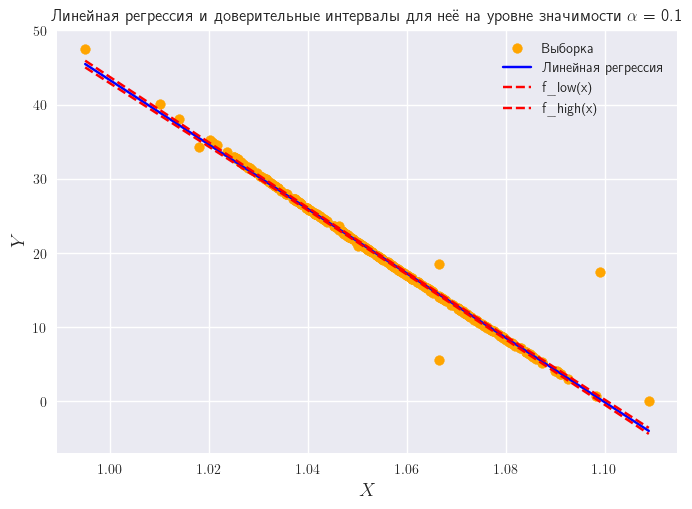

In [145]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

#### Построить график остатков $\varepsilon(x) = y - f(x)$

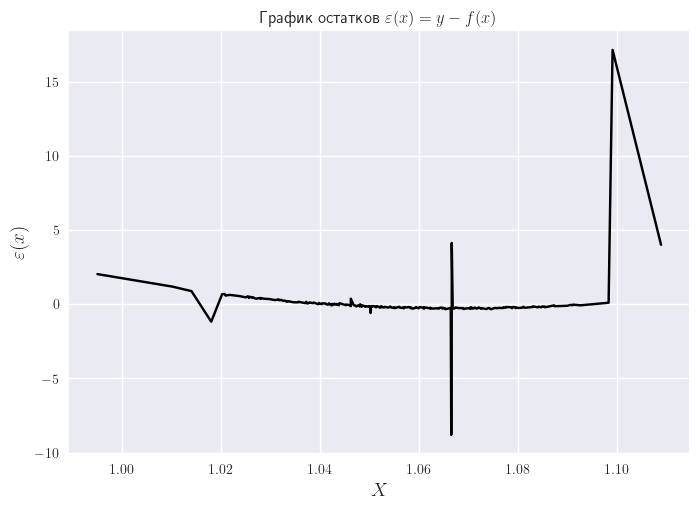

In [146]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

### 9.1.3. Проверка значимости линейной регрессионной модели

Статистическая гипотеза $H_0:\ \beta_1 = 0; \quad H':\ \beta_1 \neq 0$.

#### Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

|                                                                                  | Выражение                                                       | Пояснение использованных обозначений                |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------- | --------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y ост} / (n - 2)}$ | $n$ - объём выборки $(x_1, y_1), \dots, (x_n, y_n)$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(1,\ n-2)$                                                    |                                                     |
| Формулы расчёта критической точки                                                | $F_{1 - \alpha,\ 1,\ n-2}$                                      | Правосторонняя критическая область.                 |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                              |                                                     |

#### Проверить значимость линейной регрессионной модели

`r_value` - выборочное значение коэффициента корреляции Пирсона $\tilde \rho^2_{XY}$. При линейной регрессии квадрат этого значения равен коэффициенту детерминации: $\tilde{\rho}_{XY}^2 = \tilde{R}^2$.

Статистику критерия же можно переписать как $Z = \dfrac{\tilde R^2}{(1 - \tilde R^2) / (n - 2)}$. Значение `p_value` у нас уже есть из функции `stats.linregress`.

In [147]:
alphas = [0.01, 0.05, 0.1]

z = r_value**2 * (n - 2) / (1 - r_value**2)

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = 0$, $H_1$: $\\beta_1 \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = 0$, $H_1$: $\beta_1 \neq 0$

$z_{выб} =$ 10044.03

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод            |
| ------------------ | --------------------------------------- | --------- | ---------------------- | ---------------- |
| 0.01               | 10044.03                                | 0.00      | $H_0$ отклоняется      | $\beta_1 \neq 0$ |
| 0.05               | 10044.03                                | 0.00      | $H_0$ отклоняется      | $\beta_1 \neq 0$ |
| 0.1                | 10044.03                                | 0.00      | $H_0$ отклоняется      | $\beta_1 \neq 0$ |

<a id="92"></a>

## 9.2 Линейная регрессионная модель общего вида

### Условие

Факторный признак $x$ - `B1` (Body density determined from underwater weighing)

Результативный признак $y$ - `B2` (Percent body fat from Siri's equation)

Уравнение регрессии (квадратичное по $x$) - $f(x) = \beta_0 + \beta_1x + \beta_2x^2$

### Определения

In [148]:
X, Y = data("9.2")
X.head(), Y.head()

(0    1.0708
 1    1.0853
 2    1.0414
 3    1.0751
 4    1.0340
 Name: B1, dtype: float64,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [149]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [150]:
k = 3

### 9.2.1. Точечные оценки линейной регрессионной модели

#### Рассчитать точечные оценки параметров линейной регрессионной модели

Построим `design matrix` = $\begin{pmatrix}1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2\end{pmatrix}$.

In [151]:
X.head()

0    1.0708
1    1.0853
2    1.0414
3    1.0751
4    1.0340
Name: B1, dtype: float64

In [152]:
X.values.reshape(-1, 1)[:5]

array([[1.0708],
       [1.0853],
       [1.0414],
       [1.0751],
       [1.034 ]])

In [153]:
design_matrix = np.column_stack([X**i for i in range(3)])
design_matrix[:5]

array([[1.        , 1.0708    , 1.14661264],
       [1.        , 1.0853    , 1.17787609],
       [1.        , 1.0414    , 1.08451396],
       [1.        , 1.0751    , 1.15584001],
       [1.        , 1.034     , 1.069156  ]])

Построим МНК-оценки параметров $\beta_0, \beta_1, \beta_2$ по формуле $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - `design matrix`, $y_{\downarrow}$ - вектор значений результативного признака.

In [154]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ 1644.23

$\tilde{\beta_1} =$ -2645.80

$\tilde{\beta_2} =$ 1047.70

| Параметр                                                                                                       | Формула расчета                                                                                                                                               | Значение                                                       |
| -------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------- |
| $\tilde \beta_{\downarrow} = \begin{pmatrix} \tilde \beta_0 \\ \tilde \beta_1 \\ \tilde \beta_2 \end{pmatrix}$ | $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - регрессионная матрица, $y_{\downarrow}$ - вектор значений результативного признака. | $\begin{pmatrix} 1644.23 \\ -2645.80 \\ 1047.70 \end{pmatrix}$ |


#### Рассчитать точечную оценку уравнения регрессии

$\tilde f(x) = \tilde \beta_0 + \tilde \beta_1x + \tilde \beta_2x^2 = 1644.23 - 2645.80x + 1047.70x^2$

In [155]:
predictions = model.predict(design_matrix)

#### Рассчитать показатели вариации, используемые в регрессионном анализе

In [156]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 68.30

$\tilde{D}_{Y ост} =$ 1.46

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X, несмещ} =$ 8606.14

$\tilde{D}_{Y ост, несмещ} =$ 1.47

$\tilde{D}_{Y общ, несмещ} =$ 70.04

| Источник вариации   | Показатель вариации                 | Число степеней свободы | Несмещённая оценка                                  |
| ------------------- | ----------------------------------- | ---------------------- | --------------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = 68.30$      | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X} = 8606.14$    |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 1.46$   | $n - k = 249$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 1.47$   |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 69.76$ | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 70.04$ |

$k$ — число оцениваемых параметров функции регрессии.

#### Проверить правило сложения дисперсий

In [157]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X} =$ 68.30

$\tilde{D}_{Y ост} =$ 1.46

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X} + \tilde{D}_{Y ост} = 69.76$

True


| Показатель | $\tilde{D}_{Y \mid X}$ | $\tilde{D}_{Y\text{ ост}}$ | $\tilde{D}_{Y \text{ общ}}$ | $\tilde{D}_{Y \mid X} + \tilde{D}_{Y\text{ ост}}$ |
| ---------- | ---------------------- | -------------------------- | --------------------------- | ------------------------------------------------- |
| Значение   | 68.30                  | 1.46                       | 69.76                       | 69.76                                             |


#### Рассчитать показатели тесноты связи между факторным и результативным признаками

In [158]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {m.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.98

$\tilde{R} =$ 0.99

| Показатель               | Формула расчета                                                                                  | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------ | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.98     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y \text{ общ}}}}$ | 0.99     |


#### Охарактеризовать тип связи между факторным и результативным признаками, определяемой рассчитанной линейной регрессией.

Наблюдается очень сильная (почти функциональная) корреляционная связь между факторным признаком `B1` и результативным признаком `B2`.

### 9.2.2. Интервальные оценки линейной регрессионной модели

#### Привести формулы расчёта доверительных интервалов для значений регрессии $f(x)$

| Границы доверительного интервала | Формула расчета                                                                                                                                                                |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Нижняя граница $f_{low}(x)$      | $\tilde f(x) - t_{1 - \frac{\alpha}{2},\ (n-k)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\overrightarrow \varphi(x)\left(F^TF\right)^{-1} \varphi_{\downarrow}(x)}$ |
| Верхняя граница $f_{high}(x)$    | $\tilde f(x) + t_{1 - \frac{\alpha}{2},\ (n-k)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\overrightarrow \varphi(x)\left(F^TF\right)^{-1} \varphi_{\downarrow}(x)}$ |

#### Построить диаграмму рассеяния признаков $x$ и $y$. Нанести на диаграмму функцию регрессии $f(x)$, а также нижние и верхние границы линии регрессии $f_{low}(x)$ и $f_{high}(x)$ на уровне значимости $\alpha = 0.1$.

In [159]:
alpha = 0.1

In [160]:
table = pd.DataFrame(
    np.column_stack(
        [X, Y, predictions, model.get_prediction(design_matrix).conf_int(alpha=alpha)]
    ),
    columns=[
        "x",
        "y",
        "f(x)",
        "f_low(x)",
        "f_high(x)",
    ],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
215,0.9950,47.5,48.903692,47.919852,49.887533
35,1.0101,40.1,40.673185,40.110841,41.235528
191,1.0140,38.1,38.625059,38.149669,39.100448
168,1.0180,34.3,36.557524,36.161372,36.953676
38,1.0202,35.2,35.434670,35.077616,35.791725
...,...,...,...,...,...
25,1.0911,3.7,4.678158,4.313571,5.042746
170,1.0926,3.0,4.141236,3.749756,4.532717
171,1.0983,0.7,2.143930,1.636895,2.650966
95,1.0991,17.4,1.869055,1.344165,2.393944


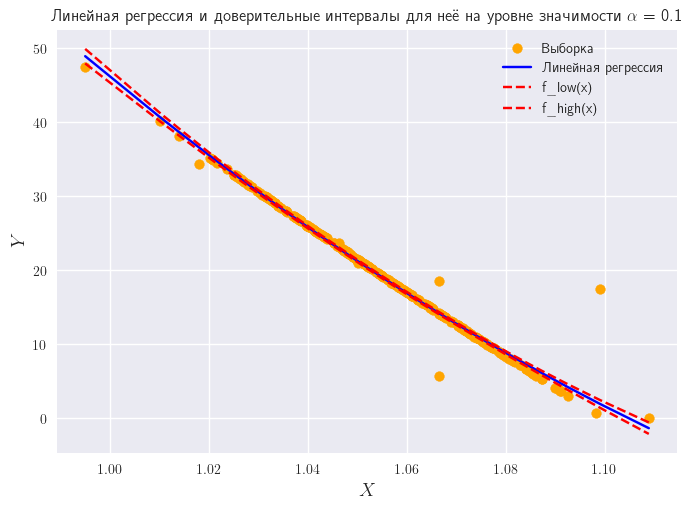

In [161]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

#### Построить график остатков $\varepsilon(x) = y - f(x)$

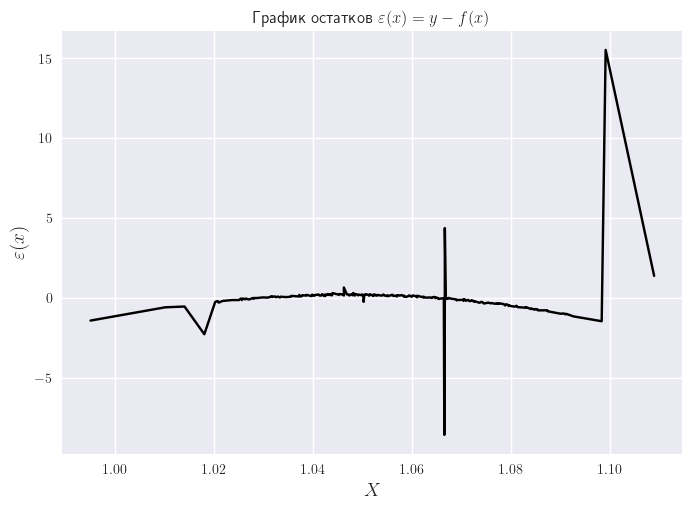

In [162]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

### 9.2.3. Проверка значимости линейной регрессионной модели

Статистическая гипотеза $H_0:\ \beta_1 = \beta_2 = 0; \quad H':\ \beta_1^2 + \beta_2^2 > 0$.

#### Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

|                                                                                  | Выражение                                                               | Пояснение использованных обозначений                |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------- | --------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\tilde{D}_{Y \mid X}^{несмещ}}{\tilde{D}_{Y ост}^{несмещ}}$ | $n$ - объём выборки $(x_1, y_1), \dots, (x_n, y_n)$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(k-1,\ n-2)$                                                          |                                                     |
| Формулы расчёта критической точки                                                | $F_{1 - \alpha,\ k-1,\ n-2}$                                            | Правосторонняя критическая область.                 |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                      |                                                     |

#### Проверить значимость линейной регрессионной модели

In [163]:
alphas = [0.01, 0.05, 0.1]

z = model.fvalue
p_value = model.f_pvalue

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = \\beta_2 = 0$, $H_1$: $\\beta_1^2 + \\beta_2^2 > 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = \beta_2 = 0$, $H_1$: $\beta_1^2 + \beta_2^2 > 0$

$z_{выб} =$ 5843.56

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистики критерия | $p$-value | Статистическое решение | Вывод                       |
| ------------------ | --------------------------------------- | --------- | ---------------------- | --------------------------- |
| 0.01               | 5843.56                                 | 0.00      | $H_0$ отклоняется      | $\beta_1^2 + \beta_2^2 > 0$ |
| 0.05               | 5843.56                                 | 0.00      | $H_0$ отклоняется      | $\beta_1^2 + \beta_2^2 > 0$ |
| 0.1                | 5843.56                                 | 0.00      | $H_0$ отклоняется      | $\beta_1^2 + \beta_2^2 > 0$ |

<a id="93"></a>

## 9.3 Множественная линейная регрессионная модель

### Условие

Факторный признак 1 $x_1$ - `B1` (Body density determined from underwater weighing)

Факторный признак 2 $x_2$ - `B4` (Age (years))

Результативный признак $y$ - `B2` (Percent body fat from Siri's equation)

Уравнение регрессии - $f(x) = \beta_0 + \beta_1x_1 + \beta_2x_2$

### Определения

In [164]:
X1, X2, Y = data("9.3")
X1.head(), X2.head(), Y.head()

(0    1.0708
 1    1.0853
 2    1.0414
 3    1.0751
 4    1.0340
 Name: B1, dtype: float64,
 0    23
 1    22
 2    22
 3    26
 4    24
 Name: B4, dtype: int64,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [165]:
print(n1 := len(X1), n2 := len(X2), n3 := len(Y))

if n1 == n2 == n3:
    n = n1

252 252 252


In [166]:
k = 3

### Рассчитать точечные оценки параметров множественной линейной регрессионной модели

В данном случае $\varphi_0(x) = 1$, $\varphi_1(x) = x_1$, $\varphi_2(x) = x_2$.

`design matrix` точно такая же: $\begin{pmatrix}1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22} \\ \vdots & \vdots & \vdots \\ 1 & x_{n1} & x_{n2}\end{pmatrix}$.

In [167]:
vector_X = np.column_stack([X1, X2])
vector_X[:5]

array([[ 1.0708, 23.    ],
       [ 1.0853, 22.    ],
       [ 1.0414, 22.    ],
       [ 1.0751, 26.    ],
       [ 1.034 , 24.    ]])

In [168]:
design_matrix = sm.add_constant(vector_X)
design_matrix[:5]

array([[ 1.    ,  1.0708, 23.    ],
       [ 1.    ,  1.0853, 22.    ],
       [ 1.    ,  1.0414, 22.    ],
       [ 1.    ,  1.0751, 26.    ],
       [ 1.    ,  1.034 , 24.    ]])

Построим МНК-оценки параметров $\beta_0, \beta_1, \beta_2$ по формуле $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - `design matrix`, $y_{\downarrow}$ - вектор значений результативного признака.

In [169]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ 474.69

$\tilde{\beta_1} =$ -432.08

$\tilde{\beta_2} =$ 0.01

| Параметр                                                                                                       | Формула расчета                                                                                                                                               | Значение                                                  |
| -------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------- |
| $\tilde \beta_{\downarrow} = \begin{pmatrix} \tilde \beta_0 \\ \tilde \beta_1 \\ \tilde \beta_2 \end{pmatrix}$ | $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - регрессионная матрица, $y_{\downarrow}$ - вектор значений результативного признака. | $\begin{pmatrix} 474.69 \\ -432.08 \\ 0.01 \end{pmatrix}$ |


### Записать точечную оценку уравнения регрессии

$\tilde f(x) = \tilde \beta_0 + \tilde \beta_1x_1 + \tilde \beta_2x_2 = 474.69 - 432.08x_1 + 0.01x_2$

In [170]:
predictions = model.predict(design_matrix)

### Рассчитать показатели вариации, используемые в регрессионном анализе

In [171]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X_1, X_2} =$ 68.09

$\tilde{D}_{Y ост} =$ 1.67

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X_1, X_2, несмещ} =$ 8578.86

$\tilde{D}_{Y ост, несмещ} =$ 1.69

$\tilde{D}_{Y общ, несмещ} =$ 70.04

| Источник вариации   | Показатель вариации                   | Число степеней свободы | Несмещённая оценка                                      |
| ------------------- | ------------------------------------- | ---------------------- | ------------------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X_1, X_2} = 68.09$ | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X_1, X_2} = 8578.86$ |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 1.67$     | $n - k = 249$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 1.69$       |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 69.76$   | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 70.04$     |

$k$ — число оцениваемых параметров функции регрессии.

### Проверить правило сложения дисперсий

In [172]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X_1, X_2} =$ 68.09

$\tilde{D}_{Y ост} =$ 1.67

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X_1, X_2} + \tilde{D}_{Y ост} = 69.76$

True


| Показатель | $\tilde{D}_{Y \mid X_1, X_2}$ | $\tilde{D}_{Y\text{ ост}}$ | $\tilde{D}_{Y \text{ общ}}$ | $\tilde{D}_{Y \mid X_1, X_2} + \tilde{D}_{Y\text{ ост}}$ |
| ---------- | ----------------------------- | -------------------------- | --------------------------- | -------------------------------------------------------- |
| Значение   | 68.09                         | 1.67                       | 69.76                       | 69.76                                                    |


### Рассчитать показатели тесноты связи между факторными и результативным признаками

In [173]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {m.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.98

$\tilde{R} =$ 0.99

| Показатель               | Формула расчета                                                                                         | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X_1, X_2}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.98     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X_1, X_2}}{\tilde{D}_{Y \text{ общ}}}}$ | 0.99     |


### Охарактеризовать тип связи между факторными и результативным признаками, определяемой рассчитанной линейной регрессией

Наблюдается очень сильная (почти функциональная) корреляционная связь между факторными признаками `B1` и `B4` и результативным признаком `B2`.

<a id="94"></a>

## 9.4 Выводы

### Сводная таблица показателей вариации для различных регрессионных моделей

| Источник вариации   | Простейшая линейная модель          | Линейная модель с квадратичным членом | Множественная линейная модель         |
| ------------------- | ----------------------------------- | ------------------------------------- | ------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = 68.06$      | $\tilde{D}_{Y \mid X} = 68.30$        | $\tilde{D}_{Y \mid X_1, X_2} = 68.09$ |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 1.69$   | $\tilde{D}_{Y\text{ ост}} = 1.46$     | $\tilde{D}_{Y\text{ ост}} = 1.67$     |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 69.76$ | $\tilde{D}_{Y \text{ общ}} = 69.76$   | $\tilde{D}_{Y \text{ общ}} = 69.76$   |

### Сводная таблица свойств различных регрессионных моделей

| Свойство              | Простейшая линейная модель | Линейная модель с квадратичным членом | Множественная линейная модель |
| --------------------- | -------------------------- | ------------------------------------- | ----------------------------- |
| Точность              | Точная                     | Точная                                | Точная                        |
| Значимость            | Значимая                   | Значимая                              | Значимая                      |
| Адекватность          | Адекватная                 | Неадекватная                          | Неадекватная                  |
| Степень тесноты связи | Очень тесная               | Очень тесная                          | Очень тесная                  |


### Вывод (в терминах предметной области)

В результате проведённого в п.9 статистического анализа обнаружено, что результативный признак `B2` имеет очень тесную связь с факторным признаком `B1`. При добавлении в модель факторного признака `B4` связь между результативным признаком и факторными признаками не ухудшилась. Все рассмотренные модели являются адекватными и значимыми.